## Тренировочные упражнения по библиотеке numpy

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации – одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension).

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ 3.
 
 
* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ True.
  
  
* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ 5.
 
 
* __Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ (np.array([2, 3, 5]), np.array([3, 3, 1])).
 
 
* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

__Замечание 1.__ Можно считать, что все указанные объекты непустые (к примеру, в __задаче 1__ на диагонали матрицы есть ненулевые элементы).

__Замечание 2.__ Для большинства задач решение занимает не больше 1-2 строк.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from tqdm import tqdm_notebook as tqdm
import math 
import random 

%matplotlib inline

In [3]:
# task 1
def task_1(x):
    p = 1
    k = min(len(x),len(x[0]))
    for i in range(0,k):
        if x[i,i]!=0:
            p*=x[i,i]
    return p

def task_1_np(x):
    return np.prod(x.diagonal()[np.nonzero(x.diagonal())])


X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])
print(task_1_np(X))

3


In [4]:
# task 2
import collections
def task_2(x, y):
    compare = True if collections.Counter(x) == collections.Counter(y) else False
    return compare

def task_2_np(x, y):
    return True if (np.array_equal(np.sort(x),np.sort(y))) else False

x = np.array([1, 1, 2, 4])
y = np.array([4, 2, 1, 1, 1])
task_2(x,y)

False

In [5]:
# task 3
def task_3(a):
#    return max(x[i] for i in range(1, len(x)) if not x[i-1])
    return a[max(filter(lambda i: not a[i-1], range(1, len(a))), key = a.__getitem__)]

def task_3_np(x): 
    return np.max(x[np.array(np.where(x[:-1] == 0))+1])

x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print(task_3(x))
print(task_3_np(x))

5
5


In [40]:
# task 4
from scipy.misc import imread
from PIL import Image

img = imread('pix.jpg', mode ='RGB')
data = np.asarray( img, dtype="int" )
coefs = [0.299, 0.587, 0.114]

def task_4(img, coefs):
#    gray = img[:,:,0] * coefs[0] +  img[:,:,1] * coefs[1] + img[:,:,2] * coefs[2]  
    res = np.zeros((len(img),len(img[0])))
    for i in range(len(img)):
        for j in range(len(img[0])):
            res[i,j] = img[i,j,0]*coefs[0] + img[i,j,1]*coefs[1] + img[i,j,2]*coefs[2]
    return res

def task_4_np(img, coefs):
#    gray = img[:,:,0] * coefs[0] +  img[:,:,1] * coefs[1] + img[:,:,2] * coefs[2]  
    img = np.dot(img[...,:3], coefs)
    return img

pil_im = task_4(data, coefs)
pil_im_np = task_4_np(data, coefs)


/home/yustiks/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


(-0.5, 2047.5, 1532.5, -0.5)

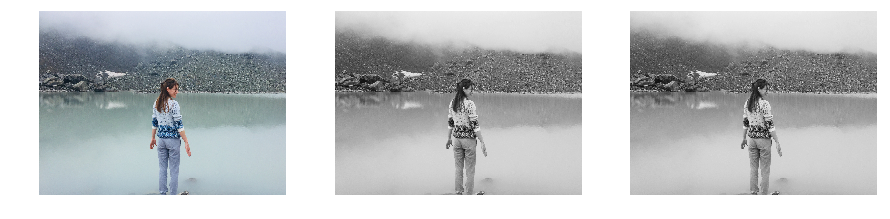

In [41]:
plt.figure(figsize=(15, 20))
plt.subplot(131) 
plt.imshow(np.asarray(img))
plt.axis('off')
plt.subplot(132) 
plt.imshow(np.asarray(pil_im), cmap = plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(133)
plt.imshow(np.asarray(pil_im_np), cmap = plt.get_cmap('gray'))
plt.axis('off')

In [7]:
# task 5
from collections import OrderedDict 
from itertools import groupby
  
# run-length encoding
def task_5(x):
    d=OrderedDict.fromkeys(x, 0) 
    for ch in x: 
        d[ch] += 1 
    return [ k for k in d ], [ v for v in d.values() ]


def task_5_np(x):
    return [k for k,g in groupby(x)],[len(list(g)) for k,g in groupby(x)]

x = np.array([3, 3, 3, 2, 2, 2, 5])
print(task_5(x))
print(task_5_np(x))

([3, 2, 5], [3, 3, 1])
([3, 2, 5], [3, 3, 1])


In [ ]:
# task 6
from scipy.spatial import distance
def task_6(X, Y):
    s = []
    for i in range(0,len(X)):
        a = []
        for j in range(0,len(Y)):
            a.append(math.sqrt((X[i][0]-Y[j][0])**2+(X[i][1]-Y[j][1])**2+(X[i][2]-Y[j][2])**2))
        s.append(a)
    return(s)
    
def task_6_np(a, b):
    aSumSquare = np.sum(np.square(a),axis=1); 
    bSumSquare = np.sum(np.square(b),axis=1); 
    mul = np.dot(a,b.T); 
    dists = np.sqrt(aSumSquare[:,np.newaxis]+bSumSquare-2*mul) 
    return dists

def task_6_cdist(x,y):
    return distance.cdist(x, y, 'euclidean')    
    
x = np.array([(2,0,7), (2,1,6), (5,2,5), (6,3,4), (9,3,3), (0,3,2), (8,5,1)])
y = np.array([(8,1,7), (4,8,6), (5,7,5), (6,6,4), (3,5,3), (2,4,2), (0,5,1)])
print(':',task_6(x,y))
print('np',task_6_np(x,y))
print('cdist',task_6_cdist(x,y))

## Визуализация результата

Для каждой задачи сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ (пример графиков есть в ячейке ниже)

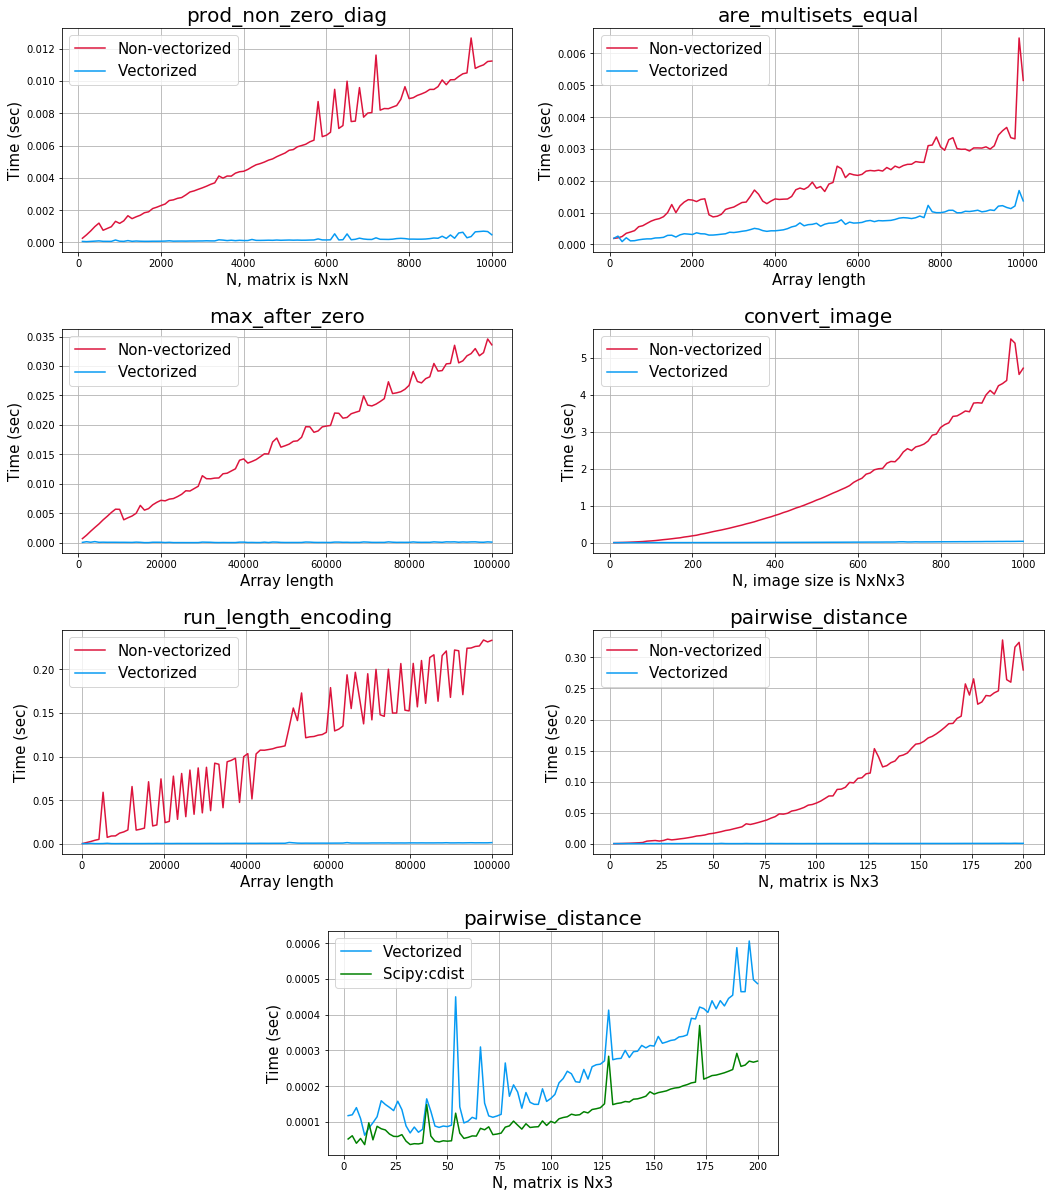

In [9]:
import time
N = 10000
start = 0
stop = N
num = N
X1 = np.linspace(start, stop, num=num)
Y1_np = np.zeros(N)
Y1 = np.zeros(N)
list_big = np.random.rand(N*N)

In [11]:
for i in range(1,N):
    lst = np.reshape(list_big[:i*i],(i, i))
    start_time = time.time()
    task_1_np(lst)
    end_time = time.time()
    time_sec = end_time-start_time
    Y1_np[i] = time_sec

In [12]:
for i in range(1,N):
    lst = np.reshape(list_big[:i*i],(i, i))
    start_time = time.time()
    task_1(lst)
    end_time = time.time()
    time_sec = end_time-start_time
    Y1[i] = time_sec

In [19]:
N = 10000
start = 0
stop = N
num = N
X2 = np.linspace(start, stop, num=num)
Y2_np = np.zeros(N)
Y2 = np.zeros(N) 
from random import shuffle
x = [i for i in range(N)]
shuffle(x)
list1 = np.array(x)
shuffle(x)
list2 = np.array(x)
for i in range(1,N):
    lst1 = list1[:i]
    lst2 = list2[:i]
    start_time = time.time()
    task_2(lst1,lst2)
    end_time = time.time()
    time_sec = end_time-start_time
    Y2[i] = time_sec

In [20]:
for i in range(1,N):
    lst1 = list1[:i]
    lst2 = list2[:i]
    start_time = time.time()
    task_2_np(lst1,lst2)
    end_time = time.time()
    time_sec = end_time-start_time
    Y2_np[i] = time_sec

In [15]:
N = 10000
start = 0
stop = N
num = N
X3 = np.linspace(start, stop, num=num)
Y3_np = np.zeros(N)
Y3 = np.zeros(N) 
list_big3 = np.random.rand(N)
list_big3[0] = 0 

In [16]:
for i in range(2,N):
    start_time = time.time()
    task_3_np(list_big3[:i])
    end_time = time.time()
    time_sec = end_time-start_time
    Y3_np[i] = time_sec

In [17]:
for i in range(2,N):
    start_time = time.time()
    task_3(list_big3[:i])
    end_time = time.time()
    time_sec = end_time-start_time
    Y3[i] = time_sec

In [46]:
N = 1000
start = 0
stop = N
num = N
X4 = np.linspace(start, stop, num=num)
Y4_np = np.zeros(N)
Y4 = np.zeros(N) 
list_big = np.random.rand(N*N*3)
coefs = [0.299, 0.587, 0.114]

for i in range(1,N):
    start_time = time.time()
#    print(np.reshape(list_big[:i*i*3],(i, i, 3)))
    task_4_np(np.reshape(list_big[:i*i*3],(i, i, 3)),coefs)
    end_time = time.time()
    time_sec = end_time-start_time
    Y4_np[i] = time_sec

[[[0.01240177 0.56963057 0.94416333]]]
[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]]

 [[0.98402989 0.12343396 0.29403019]
  [0.03076069 0.6606683  0.37089409]]]
[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]]

 [[0.03076069 0.6606683  0.37089409]
  [0.44880609 0.26078596 0.25377269]
  [0.64925693 0.37977771 0.34302291]]

 [[0.47891049 0.97721046 0.2166863 ]
  [0.19634167 0.6093886  0.04588522]
  [0.39950083 0.09037546 0.97356009]]]
[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  [0.03076069 0.6606683  0.37089409]]

 [[0.44880609 0.26078596 0.25377269]
  [0.64925693 0.37977771 0.34302291]
  [0.47891049 0.97721046 0.2166863 ]
  [0.19634167 0.6093886  0.04588522]]

 [[0.39950083 0.09037546 0.97356009]
  [0.75761608 0.47258831 0.58435598]
  [0.50725049 0.63702331 0.19019413]
  [0.34702305 0.78729835 0.89339622]]

 [[0.97670427 0.9205

[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.1765542  0.86014161 0.7609549 ]
  [0.6679514  0.42036316 0.47802442]
  [0.48532169 0.26499119 0.38455701]]

 [[0.8794706  0.77163886 0.38242374]
  [0.67232994 0.48403603 0.97117036]
  [0.97490628 0.82030996 0.42320293]
  ...
  [0.1248488  0.25218384 0.19276284]
  [0.80849106 0.11988326 0.06014122]
  [0.60504638 0.47477463 0.10067006]]

 [[0.50339    0.22437455 0.93858284]
  [0.80162707 0.29530434 0.65545311]
  [0.69721706 0.78435227 0.67240903]
  ...
  [0.61782242 0.5190352  0.79746214]
  [0.76683042 0.82468873 0.55841334]
  [0.89591455 0.77892659 0.62899956]]

 ...

 [[0.574161   0.71118916 0.12451787]
  [0.19526802 0.5220992  0.28890076]
  [0.01148537 0.3406919  0.19189931]
  ...
  [0.63635667 0.80161845 0.7090493 ]
  [0.72104908 0.50220749 0.76457497]
  [0.32473303 0.72944832 0.85458973]]

 [[0.66666972 0.93486391 0.25440765]
  [0.056306   0.35915875 0.58137431]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.99000324 0.06191478 0.13172559]
  [0.08973564 0.80906942 0.71307128]
  [0.71019855 0.21698028 0.17599774]]

 [[0.83930737 0.023068   0.19585523]
  [0.38502079 0.80969598 0.70045736]
  [0.25912671 0.86812493 0.95241417]
  ...
  [0.69626597 0.86279805 0.36374875]
  [0.00194687 0.2341164  0.22181283]
  [0.99868318 0.70912641 0.21623242]]

 [[0.56209472 0.33407233 0.33393824]
  [0.92654549 0.84623699 0.51951824]
  [0.7158759  0.1597573  0.91189965]
  ...
  [0.44654683 0.65839011 0.56148042]
  [0.08598064 0.58241313 0.94174675]
  [0.56128347 0.98832924 0.30060108]]

 ...

 [[0.78945815 0.95575705 0.80644517]
  [0.2637439  0.2936431  0.03100054]
  [0.96990576 0.73671843 0.92747835]
  ...
  [0.90598963 0.0541615  0.08182282]
  [0.33722995 0.5107111  0.10039649]
  [0.48448187 0.09996273 0.92537213]]

 [[0.61141096 0.07381455 0.29596121]
  [0.56239878 0.88855825 0.30587341]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.91385589 0.41617157 0.02860373]
  [0.03737336 0.05635322 0.788928  ]
  [0.54508257 0.26002288 0.97113688]]

 [[0.48640911 0.38320553 0.89962106]
  [0.49570645 0.4868191  0.28062039]
  [0.01560242 0.92414534 0.50168835]
  ...
  [0.18990312 0.92642272 0.22571731]
  [0.27183722 0.90338945 0.01113273]
  [0.49189573 0.31643336 0.53328548]]

 [[0.78213582 0.85852308 0.64051369]
  [0.65815694 0.67367221 0.07784915]
  [0.45873048 0.79645689 0.79974138]
  ...
  [0.04148733 0.73708134 0.85732732]
  [0.0810709  0.09515531 0.22757732]
  [0.6402159  0.70118748 0.34935177]]

 ...

 [[0.29518254 0.42170527 0.12403222]
  [0.93313815 0.69642016 0.35234257]
  [0.92342172 0.56623733 0.3700542 ]
  ...
  [0.58727172 0.53080807 0.86270926]
  [0.25344435 0.05149774 0.9499707 ]
  [0.28891152 0.29171795 0.80276729]]

 [[0.08637879 0.54913036 0.41527242]
  [0.28127869 0.62682479 0.46062568]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.07041831 0.21362816 0.74783192]
  [0.75183818 0.92723819 0.12116366]
  [0.11678052 0.22881616 0.60794098]]

 [[0.31662584 0.39407142 0.9499397 ]
  [0.01238113 0.99771549 0.45162772]
  [0.80748844 0.51034233 0.8954735 ]
  ...
  [0.51683153 0.45246054 0.65444613]
  [0.99475702 0.14150274 0.46412161]
  [0.27887853 0.89877005 0.26385547]]

 [[0.64167395 0.97869218 0.33493968]
  [0.88765689 0.33444876 0.89231019]
  [0.08387416 0.99811967 0.99276554]
  ...
  [0.33290567 0.72533668 0.88066039]
  [0.60391244 0.13113688 0.55932589]
  [0.58713553 0.91057149 0.61865293]]

 ...

 [[0.44351131 0.54199423 0.43342148]
  [0.64283569 0.49088397 0.96518034]
  [0.76380182 0.94764232 0.09639494]
  ...
  [0.38235633 0.31360222 0.59066875]
  [0.78793249 0.43825926 0.61123769]
  [0.4392973  0.58373544 0.86716713]]

 [[0.14033888 0.46672319 0.03167699]
  [0.81103034 0.36200856 0.35531024]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.69626597 0.86279805 0.36374875]
  [0.00194687 0.2341164  0.22181283]
  [0.99868318 0.70912641 0.21623242]]

 [[0.56209472 0.33407233 0.33393824]
  [0.92654549 0.84623699 0.51951824]
  [0.7158759  0.1597573  0.91189965]
  ...
  [0.56969393 0.41178147 0.70481479]
  [0.77141621 0.1292577  0.10371644]
  [0.45121624 0.67534951 0.2253582 ]]

 [[0.65399792 0.0191052  0.06038603]
  [0.05495585 0.94152931 0.26941324]
  [0.17977972 0.47322823 0.63019474]
  ...
  [0.16390039 0.20637134 0.39961888]
  [0.74129891 0.38758151 0.14978516]
  [0.91743395 0.82145469 0.62293316]]

 ...

 [[0.98161042 0.74665631 0.66344966]
  [0.84632582 0.29679966 0.27413508]
  [0.44820021 0.67371532 0.76337033]
  ...
  [0.49474797 0.0227167  0.00803311]
  [0.63220794 0.07487715 0.27907597]
  [0.43450475 0.20117435 0.76347779]]

 [[0.9171836  0.7599371  0.64274359]
  [0.01626655 0.40968966 0.62958037]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.17989577 0.44476209 0.09100794]
  [0.97412924 0.88402937 0.86553701]
  [0.75229871 0.56781535 0.64528957]]

 [[0.85385229 0.09223717 0.95099177]
  [0.7573074  0.51739844 0.40387982]
  [0.31215891 0.47383472 0.94160537]
  ...
  [0.15087765 0.27325715 0.94939258]
  [0.06821465 0.24878876 0.50190639]
  [0.80188267 0.73545799 0.82879099]]

 [[0.31826606 0.79679595 0.69951688]
  [0.40038925 0.50200339 0.4029636 ]
  [0.75765831 0.74500775 0.25005355]
  ...
  [0.91580072 0.06913373 0.67075019]
  [0.77287678 0.10999305 0.90436044]
  [0.10183962 0.96893972 0.98790305]]

 ...

 [[0.03224635 0.05518313 0.04018098]
  [0.802467   0.16420416 0.68967649]
  [0.95028593 0.16237057 0.23817797]
  ...
  [0.17959759 0.15591934 0.72592133]
  [0.50475689 0.39764589 0.98576636]
  [0.06849543 0.07877592 0.84644928]]

 [[0.53075727 0.03809042 0.48895216]
  [0.44432308 0.78874077 0.43862502]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.58124627 0.43994262 0.92639552]
  [0.1582164  0.23614437 0.94720297]
  [0.92633284 0.9409234  0.30049304]]

 [[0.99209769 0.53555591 0.01099689]
  [0.03763442 0.1016833  0.41860946]
  [0.36518477 0.62629984 0.5212784 ]
  ...
  [0.71142729 0.20703884 0.81144633]
  [0.28567552 0.16567852 0.68974222]
  [0.65973904 0.55945807 0.293883  ]]

 [[0.32730359 0.25780612 0.85814851]
  [0.67897047 0.6573187  0.27442438]
  [0.78436455 0.57196913 0.01931819]
  ...
  [0.04942171 0.21406079 0.46731197]
  [0.59765702 0.70032734 0.84424039]
  [0.40433646 0.49090487 0.97533225]]

 ...

 [[0.56871639 0.6118639  0.41665436]
  [0.68524866 0.6087471  0.94181621]
  [0.80935101 0.86681336 0.26638618]
  ...
  [0.28176629 0.06499503 0.39063124]
  [0.15348658 0.41684293 0.3994668 ]
  [0.99748129 0.37340185 0.28506253]]

 [[0.83405343 0.03715184 0.63927979]
  [0.24283143 0.33934529 0.21907572]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.90992572 0.33936441 0.55565194]
  [0.41699834 0.49380629 0.23234016]
  [0.24458688 0.06351081 0.59488377]]

 [[0.50467839 0.73624843 0.10627378]
  [0.61014058 0.0041332  0.34526581]
  [0.43107496 0.4321491  0.70655351]
  ...
  [0.43080393 0.06219885 0.19835717]
  [0.62873233 0.91143824 0.04087545]
  [0.9684852  0.05595496 0.44475011]]

 [[0.78773967 0.88219465 0.76784968]
  [0.2678017  0.1837793  0.46143641]
  [0.61835051 0.07689588 0.94634717]
  ...
  [0.12700339 0.14311474 0.45923973]
  [0.74762808 0.79541292 0.59616185]
  [0.17879987 0.70661515 0.30974603]]

 ...

 [[0.92868589 0.96992164 0.77634074]
  [0.63173547 0.78738366 0.28814612]
  [0.42539859 0.11452539 0.99561472]
  ...
  [0.20387435 0.81915646 0.13268841]
  [0.91925749 0.01478236 0.98896782]
  [0.41483924 0.5424595  0.21665662]]

 [[0.82808551 0.50117596 0.8352879 ]
  [0.47078655 0.87404953 0.52209659]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.67719287 0.79974969 0.82352717]
  [0.36385391 0.09276633 0.39466079]
  [0.51775615 0.93089165 0.99973972]]

 [[0.78014069 0.15345157 0.51209892]
  [0.50306851 0.6955109  0.2908169 ]
  [0.89919965 0.76385426 0.7419899 ]
  ...
  [0.35746333 0.29816951 0.32259649]
  [0.75483361 0.47683605 0.08375185]
  [0.34271853 0.26422768 0.71193538]]

 [[0.63281444 0.64553393 0.77143898]
  [0.06216872 0.72874356 0.15303142]
  [0.10497543 0.31798015 0.1413295 ]
  ...
  [0.5799802  0.59952106 0.78373755]
  [0.00107554 0.71903362 0.672208  ]
  [0.06523624 0.70555835 0.37621505]]

 ...

 [[0.94797262 0.68166087 0.65942798]
  [0.38934924 0.51010304 0.10021743]
  [0.49492863 0.92417049 0.32297857]
  ...
  [0.38878441 0.76240716 0.34712368]
  [0.24331068 0.79703213 0.65891743]
  [0.0161656  0.76399129 0.27143886]]

 [[0.65200286 0.18464294 0.10612428]
  [0.54377789 0.9773004  0.82856603]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.47846389 0.3714409  0.81870908]
  [0.24312527 0.19339347 0.8940559 ]
  [0.5671768  0.45679494 0.87639889]]

 [[0.1493856  0.14843363 0.95098313]
  [0.68820178 0.9988136  0.64509032]
  [0.76997558 0.12587007 0.67932439]
  ...
  [0.05607371 0.69147276 0.75973457]
  [0.68201512 0.61060799 0.26837284]
  [0.71999687 0.21710489 0.28195701]]

 [[0.99163046 0.34407142 0.65030785]
  [0.41612349 0.43016057 0.00254761]
  [0.71503609 0.06884277 0.71648985]
  ...
  [0.32322395 0.88228472 0.9007615 ]
  [0.1160022  0.95331385 0.56724053]
  [0.98007678 0.1952745  0.53024947]]

 ...

 [[0.47082556 0.49921754 0.716785  ]
  [0.42035661 0.12978599 0.06289485]
  [0.29656685 0.48087988 0.12760663]
  ...
  [0.833584   0.66523791 0.72982087]
  [0.95129642 0.66429664 0.10665668]
  [0.35983966 0.62118129 0.89183602]]

 [[0.37974544 0.40363087 0.86733438]
  [0.90639158 0.47161673 0.53482566]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.74541573 0.21886408 0.37783996]
  [0.28891101 0.63065863 0.54975549]
  [0.55427766 0.10253958 0.73670935]]

 [[0.08398524 0.35810154 0.57190477]
  [0.20490821 0.55632786 0.3998572 ]
  [0.7105632  0.23298902 0.0059247 ]
  ...
  [0.41433856 0.58055458 0.81002282]
  [0.72405726 0.99755262 0.80294586]
  [0.39867328 0.94573845 0.56101739]]

 [[0.62852235 0.97800601 0.79151336]
  [0.89296631 0.81131679 0.46453531]
  [0.85094218 0.01655666 0.38260592]
  ...
  [0.28630703 0.57451184 0.39476974]
  [0.60567688 0.16320337 0.68898407]
  [0.21732677 0.38455548 0.46858181]]

 ...

 [[0.10375466 0.3613089  0.1654458 ]
  [0.20041382 0.02743377 0.32652799]
  [0.67474301 0.91046495 0.81150088]
  ...
  [0.29455452 0.80012197 0.99769554]
  [0.69006001 0.55060226 0.31505938]
  [0.97921112 0.43859704 0.42518798]]

 [[0.86903524 0.04385141 0.258453  ]
  [0.32239011 0.5462478  0.83090356]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.32434215 0.32306179 0.77021203]
  [0.96448936 0.81772948 0.61532009]
  [0.93855121 0.79894309 0.41514162]]

 [[0.40921672 0.41904044 0.30714968]
  [0.25958454 0.22664055 0.35252111]
  [0.03447357 0.11056518 0.10187778]
  ...
  [0.04633279 0.4061987  0.34548595]
  [0.19584316 0.42689108 0.86021159]
  [0.60549283 0.38540561 0.72853489]]

 [[0.79556727 0.30778708 0.20949704]
  [0.02997376 0.09561666 0.26213425]
  [0.53180994 0.96777333 0.67672859]
  ...
  [0.17792146 0.19798605 0.18493572]
  [0.4368038  0.43178131 0.33237059]
  [0.18991828 0.77924613 0.8960231 ]]

 ...

 [[0.95550619 0.96775432 0.26310071]
  [0.4937134  0.88874944 0.11576758]
  [0.43969971 0.75979393 0.08963445]
  ...
  [0.17835204 0.77179451 0.14783099]
  [0.14404676 0.21602946 0.22939105]
  [0.89647578 0.516091   0.91663834]]

 [[0.9696095  0.77907402 0.51149529]
  [0.61219058 0.57608465 0.69412121]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.74873548 0.97632263 0.00155388]
  [0.10893005 0.26920105 0.44931105]
  [0.08176556 0.41667863 0.78972867]]

 [[0.6038671  0.54668551 0.96507377]
  [0.0776777  0.83633793 0.84588572]
  [0.14040831 0.15936846 0.1057294 ]
  ...
  [0.22200531 0.97612594 0.84355378]
  [0.87479207 0.7030072  0.2930309 ]
  [0.80772159 0.50321031 0.59304233]]

 [[0.3160659  0.28955752 0.52104198]
  [0.20900434 0.68488752 0.25525048]
  [0.54390171 0.6826937  0.61230624]
  ...
  [0.97410215 0.54202787 0.95298127]
  [0.58314077 0.19891992 0.54758817]
  [0.57156058 0.49055486 0.89530915]]

 ...

 [[0.845433   0.35263848 0.75805928]
  [0.96016669 0.76962797 0.31603746]
  [0.47752649 0.70309383 0.43425764]
  ...
  [0.92506087 0.08839106 0.69118563]
  [0.67060684 0.78611093 0.31642556]
  [0.6741859  0.72655808 0.64759938]]

 [[0.78815701 0.18393217 0.80288277]
  [0.308449   0.93620711 0.10856054]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.71003335 0.07716644 0.57943846]
  [0.23607701 0.2719708  0.22934718]
  [0.75859407 0.09854673 0.85449514]]

 [[0.81917022 0.66723003 0.90370551]
  [0.21079051 0.55175983 0.78099822]
  [0.07090361 0.03299581 0.18332123]
  ...
  [0.9240356  0.85746066 0.98678826]
  [0.51639355 0.2543927  0.36927343]
  [0.80091439 0.26593519 0.07864177]]

 [[0.69190973 0.40122336 0.93667653]
  [0.8481555  0.52863648 0.05934388]
  [0.07540373 0.20931981 0.25637205]
  ...
  [0.59438479 0.27650604 0.74962727]
  [0.9065374  0.54750344 0.09954346]
  [0.96560532 0.83817712 0.41698831]]

 ...

 [[0.23910798 0.71905678 0.52420586]
  [0.1923071  0.64579979 0.20749008]
  [0.60594655 0.41098685 0.0509947 ]
  ...
  [0.17493006 0.83947028 0.74146738]
  [0.91146581 0.76731298 0.43533759]
  [0.08201179 0.75994855 0.01423617]]

 [[0.90570924 0.03809794 0.82277745]
  [0.68278628 0.95412114 0.95988009]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.85405218 0.28450504 0.95133557]
  [0.01790504 0.4762548  0.63069735]
  [0.77996082 0.23762906 0.74394003]]

 [[0.05811542 0.73641645 0.1387033 ]
  [0.122469   0.38716671 0.45079678]
  [0.45471548 0.50299088 0.35986707]
  ...
  [0.26339858 0.77464762 0.15850598]
  [0.8770545  0.66349238 0.13525888]
  [0.28458736 0.04310227 0.2668394 ]]

 [[0.86342553 0.70581148 0.58092401]
  [0.23979075 0.51589051 0.19598967]
  [0.68101603 0.04164352 0.68360861]
  ...
  [0.52764918 0.73042741 0.62277837]
  [0.13501101 0.77499113 0.11868796]
  [0.12304313 0.61931803 0.34396279]]

 ...

 [[0.1913691  0.46748162 0.35179696]
  [0.70934881 0.07768597 0.47819833]
  [0.4350137  0.52837625 0.07270342]
  ...
  [0.26735025 0.14582659 0.40835724]
  [0.03718669 0.73781557 0.51244681]
  [0.05397937 0.59425289 0.94931809]]

 [[0.59640788 0.71038673 0.98086186]
  [0.70998859 0.17175473 0.24375297]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.06968133 0.42843472 0.57680942]
  [0.41024588 0.76706298 0.40171296]
  [0.11841379 0.47650058 0.55788956]]

 [[0.62380359 0.44956572 0.6719873 ]
  [0.68727553 0.37435785 0.87958856]
  [0.48233556 0.11535185 0.12361285]
  ...
  [0.62388399 0.30491471 0.76420861]
  [0.46959994 0.34356292 0.59598953]
  [0.33166058 0.83851077 0.72453832]]

 [[0.4640885  0.46200611 0.97502247]
  [0.57663046 0.61459868 0.12726298]
  [0.63663717 0.55914854 0.41469627]
  ...
  [0.20529913 0.47533743 0.13029426]
  [0.8609869  0.86200162 0.81935343]
  [0.17095259 0.64629262 0.52201832]]

 ...

 [[0.43547641 0.87305138 0.80855344]
  [0.44487301 0.55347319 0.65121772]
  [0.01382566 0.12654588 0.00612843]
  ...
  [0.70757756 0.26549406 0.0512189 ]
  [0.786108   0.55632387 0.42694726]
  [0.24149595 0.38030075 0.02167196]]

 [[0.80218339 0.64409036 0.99249534]
  [0.72925709 0.92854805 0.22109168]


[[[1.24017720e-02 5.69630571e-01 9.44163331e-01]
  [6.87682679e-01 5.64934780e-01 2.71467359e-01]
  [9.84029892e-01 1.23433964e-01 2.94030189e-01]
  ...
  [5.42234723e-02 7.98526926e-01 7.52181622e-01]
  [5.06426556e-01 6.93188677e-01 2.15534229e-01]
  [6.28806280e-01 4.09238837e-01 3.20306388e-01]]

 [[1.21319852e-01 5.20110220e-01 1.45946567e-01]
  [1.09901953e-01 4.47924712e-01 9.95818799e-01]
  [4.43124301e-01 9.65323396e-02 2.39432517e-01]
  ...
  [3.41628201e-01 2.69513276e-01 9.97832323e-01]
  [1.79027585e-01 4.05254346e-01 5.27296726e-01]
  [8.31949094e-01 8.89261553e-01 6.43690422e-01]]

 [[1.11281572e-01 2.71677183e-01 6.34668267e-01]
  [1.29546786e-01 2.22192797e-01 6.66190191e-02]
  [4.81892354e-01 1.48981943e-01 4.26255040e-01]
  ...
  [9.15756746e-01 6.94427946e-01 1.04300243e-01]
  [8.86504203e-01 4.03113203e-02 2.99181629e-01]
  [1.04396618e-01 8.05251303e-01 7.86756163e-01]]

 ...

 [[9.05867463e-01 9.00680209e-01 1.27664681e-01]
  [5.42510243e-02 2.80441400e-01 5.5726

[[[1.24017720e-02 5.69630571e-01 9.44163331e-01]
  [6.87682679e-01 5.64934780e-01 2.71467359e-01]
  [9.84029892e-01 1.23433964e-01 2.94030189e-01]
  ...
  [1.48965334e-01 8.98935821e-01 2.79533659e-01]
  [5.69232172e-01 9.25676216e-01 9.17582913e-01]
  [5.34680300e-01 8.33294982e-01 3.62605924e-01]]

 [[5.66263909e-02 1.95086380e-01 5.38793822e-01]
  [7.03452314e-01 7.34905356e-01 9.41352460e-01]
  [7.95904604e-01 9.44326903e-01 1.57655548e-01]
  ...
  [7.99332209e-01 6.57981027e-01 2.67196877e-01]
  [5.40193252e-01 8.39203339e-02 8.69696076e-01]
  [5.58103549e-01 1.62090802e-01 3.91569077e-01]]

 [[5.12883850e-01 5.13634115e-01 9.09662114e-01]
  [6.60696274e-01 8.55008830e-01 2.67869396e-01]
  [1.34116677e-01 8.03042706e-01 3.54733626e-01]
  ...
  [6.03492224e-01 9.82564962e-01 3.28398357e-01]
  [3.84997898e-01 2.48044177e-01 1.85627660e-02]
  [5.70109980e-01 9.28818901e-02 1.16222091e-01]]

 ...

 [[4.06320966e-01 3.79416688e-01 1.50888269e-02]
  [7.06980413e-01 5.01938642e-01 7.8831

[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.54866216 0.79084612 0.3934713 ]
  [0.17391537 0.18398458 0.50552756]
  [0.69194122 0.32556371 0.06428741]]

 [[0.1406472  0.59995839 0.76589971]
  [0.88601821 0.75026368 0.42701579]
  [0.67573837 0.18768454 0.338266  ]
  ...
  [0.40136449 0.53106889 0.00512927]
  [0.01651528 0.99868598 0.08180527]
  [0.50618446 0.9873469  0.0932182 ]]

 [[0.21574725 0.92833418 0.48593288]
  [0.64170825 0.02040946 0.97275866]
  [0.01512671 0.5623014  0.11915079]
  ...
  [0.92329552 0.26679825 0.00681568]
  [0.06035288 0.27731011 0.54751628]
  [0.21288496 0.35000307 0.25331741]]

 ...

 [[0.34623788 0.76456598 0.08848735]
  [0.0546146  0.9266524  0.50931435]
  [0.89661582 0.46120481 0.68421005]
  ...
  [0.08316549 0.82877731 0.91301621]
  [0.19823724 0.55988357 0.19910352]
  [0.43951167 0.34129163 0.35273191]]

 [[0.37141622 0.52414008 0.59925643]
  [0.18514465 0.74841748 0.70323083]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.94119635 0.00235286 0.19486427]
  [0.09136593 0.16368479 0.65373303]
  [0.92077062 0.18230468 0.32135474]]

 [[0.6766553  0.82114169 0.5075822 ]
  [0.76675851 0.36667619 0.32745453]
  [0.07164323 0.98753262 0.76766073]
  ...
  [0.63986251 0.88434472 0.01133441]
  [0.03729528 0.64678852 0.99208054]
  [0.27368212 0.37544914 0.52026875]]

 [[0.52174196 0.95572651 0.68773006]
  [0.51116159 0.44448093 0.5970962 ]
  [0.15457353 0.56540788 0.25020303]
  ...
  [0.47035569 0.88526456 0.59768183]
  [0.26973208 0.75417562 0.69238586]
  [0.81507939 0.89677719 0.4548273 ]]

 ...

 [[0.88489211 0.61184865 0.00162129]
  [0.69840868 0.94822793 0.06970894]
  [0.53002566 0.00381656 0.66597344]
  ...
  [0.65761145 0.51717371 0.20546835]
  [0.14967471 0.86968566 0.99946095]
  [0.24265013 0.39608558 0.08175116]]

 [[0.72023632 0.85316893 0.17514953]
  [0.49603183 0.61942298 0.73111142]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.34722585 0.51144495 0.60418333]
  [0.54048825 0.76810458 0.8511593 ]
  [0.18402973 0.44628503 0.36771161]]

 [[0.01967246 0.11743342 0.00682456]
  [0.93583891 0.25599155 0.44859762]
  [0.61263542 0.32284554 0.42716486]
  ...
  [0.41617322 0.82866859 0.66798304]
  [0.88369637 0.50029063 0.33603604]
  [0.92711415 0.15183976 0.18767557]]

 [[0.33645451 0.35287338 0.11257668]
  [0.62505445 0.75616047 0.94251357]
  [0.97299749 0.81304113 0.94292211]
  ...
  [0.56661646 0.94240891 0.00258164]
  [0.90520268 0.62775161 0.93428564]
  [0.76071864 0.03920133 0.13118064]]

 ...

 [[0.89606449 0.31435136 0.97310149]
  [0.96545629 0.41916831 0.86242128]
  [0.51849082 0.3640427  0.42182354]
  ...
  [0.26891863 0.5100661  0.29626968]
  [0.77299508 0.24760841 0.37257003]
  [0.28104405 0.07466161 0.50917511]]

 [[0.08132892 0.39860197 0.85563082]
  [0.07694886 0.90257561 0.7831075 ]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.38936221 0.77756292 0.38227336]
  [0.82488515 0.05666754 0.7817355 ]
  [0.33592588 0.49952705 0.68678694]]

 [[0.65064346 0.18192566 0.51102507]
  [0.21138172 0.63418259 0.90088175]
  [0.1409565  0.3879498  0.75943538]
  ...
  [0.08974435 0.53516538 0.71007388]
  [0.36059193 0.83887447 0.50883659]
  [0.85753558 0.17935455 0.04509848]]

 [[0.55028164 0.86411714 0.73088982]
  [0.17707557 0.12957767 0.81851082]
  [0.64496695 0.11064656 0.53820257]
  ...
  [0.05812057 0.33854678 0.32614435]
  [0.13033601 0.18237886 0.35280208]
  [0.9727     0.98485223 0.16613331]]

 ...

 [[0.55476773 0.95296054 0.47654489]
  [0.89584825 0.5411677  0.73690544]
  [0.85115123 0.8645887  0.88019362]
  ...
  [0.23486878 0.1658515  0.7105942 ]
  [0.05638383 0.74583818 0.90486702]
  [0.51178065 0.14360285 0.70854462]]

 [[0.47305456 0.81238032 0.51757648]
  [0.43198404 0.10549196 0.01056325]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.75598315 0.33759317 0.16930428]
  [0.54438665 0.90051678 0.57343209]
  [0.69691534 0.32318394 0.40146096]]

 [[0.56969393 0.41178147 0.70481479]
  [0.77141621 0.1292577  0.10371644]
  [0.45121624 0.67534951 0.2253582 ]
  ...
  [0.17171848 0.00130509 0.88591961]
  [0.32663125 0.54395786 0.71105645]
  [0.40210219 0.62760563 0.53819717]]

 [[0.00992615 0.73677942 0.02429901]
  [0.64211005 0.23617661 0.54638275]
  [0.50705233 0.28930328 0.82418235]
  ...
  [0.60480479 0.07574107 0.55985906]
  [0.53457918 0.64214602 0.94261682]
  [0.09191217 0.12028257 0.19998607]]

 ...

 [[0.88476912 0.17074753 0.28806466]
  [0.76746957 0.49240201 0.87635434]
  [0.14176465 0.27475748 0.31150058]
  ...
  [0.15384788 0.8542873  0.56662107]
  [0.45316383 0.89854078 0.17068565]
  [0.28934334 0.06155881 0.75826136]]

 [[0.92285386 0.39646503 0.47493658]
  [0.02666425 0.44624005 0.50217627]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.07451857 0.30377353 0.33114607]
  [0.68055187 0.94688064 0.98700281]
  [0.87834087 0.28414243 0.39953649]]

 [[0.07032121 0.8661868  0.19659941]
  [0.13240952 0.07373541 0.78504923]
  [0.11329933 0.95373787 0.24294991]
  ...
  [0.43877585 0.40605236 0.29242765]
  [0.61611608 0.36526274 0.91032566]
  [0.74718944 0.28940964 0.17976196]]

 [[0.89762314 0.64077065 0.95095736]
  [0.22044649 0.54463853 0.29727536]
  [0.13819812 0.30424243 0.0719615 ]
  ...
  [0.39750184 0.68779539 0.7298687 ]
  [0.7500247  0.23197232 0.72259711]
  [0.22491752 0.28836138 0.5393132 ]]

 ...

 [[0.30955228 0.08130166 0.2346562 ]
  [0.59231641 0.9303276  0.40583372]
  [0.01783265 0.78624789 0.76490469]
  ...
  [0.99548678 0.66825565 0.87624388]
  [0.71093275 0.83466471 0.84932093]
  [0.38200969 0.79764006 0.04419513]]

 [[0.39161983 0.01440701 0.40415349]
  [0.6997423  0.02529957 0.93160502]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.29048693 0.48675838 0.34991191]
  [0.95185514 0.69872837 0.31549904]
  [0.9810592  0.04051356 0.05167649]]

 [[0.79970417 0.00881199 0.33007449]
  [0.42035671 0.31306853 0.59801751]
  [0.61159114 0.83624614 0.30937259]
  ...
  [0.79280159 0.94667721 0.35121329]
  [0.50070709 0.73407561 0.93663125]
  [0.86309199 0.65948796 0.08354835]]

 [[0.23890896 0.83187256 0.90018356]
  [0.83054402 0.04280958 0.67429549]
  [0.67018581 0.14634787 0.22387849]
  ...
  [0.24085118 0.0241618  0.12658062]
  [0.66808868 0.53097204 0.61922132]
  [0.82495731 0.43317464 0.02795365]]

 ...

 [[0.72415629 0.48389935 0.48633375]
  [0.74395073 0.49602434 0.26329759]
  [0.53921538 0.44421301 0.92360264]
  ...
  [0.29855931 0.96308426 0.81898965]
  [0.81501417 0.06234727 0.76743491]
  [0.62019759 0.4913273  0.66653575]]

 [[0.06294184 0.07414801 0.22712305]
  [0.34160553 0.01487251 0.80074104]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.38888755 0.41494666 0.90193724]
  [0.22921312 0.67566529 0.87455995]
  [0.73844801 0.09868375 0.63484315]]

 [[0.72631436 0.2046488  0.60366744]
  [0.87192439 0.60996712 0.32126704]
  [0.87700472 0.14715183 0.87470917]
  ...
  [0.87474924 0.1430322  0.026599  ]
  [0.38894193 0.83048759 0.13843085]
  [0.52668349 0.31651635 0.10325903]]

 [[0.28808174 0.99883331 0.64046518]
  [0.25440845 0.73561654 0.45941978]
  [0.45666235 0.25986538 0.7487413 ]
  ...
  [0.26259459 0.0212293  0.08300293]
  [0.23305696 0.47915831 0.70166313]
  [0.59731053 0.79355223 0.62394288]]

 ...

 [[0.72155698 0.97938827 0.98707227]
  [0.06160109 0.99215879 0.70436675]
  [0.75551009 0.30744144 0.45475354]
  ...
  [0.82511826 0.76684467 0.44525419]
  [0.25042959 0.39271557 0.27631192]
  [0.23142721 0.2974036  0.52650576]]

 [[0.33973268 0.22990155 0.3433485 ]
  [0.69543259 0.21895401 0.63767622]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.93141871 0.39916463 0.62189248]
  [0.16179961 0.22974381 0.41366517]
  [0.91214353 0.29682944 0.40334007]]

 [[0.20170911 0.26725574 0.8335183 ]
  [0.69011533 0.07732416 0.66260414]
  [0.14556914 0.54121002 0.39847127]
  ...
  [0.32322395 0.88228472 0.9007615 ]
  [0.1160022  0.95331385 0.56724053]
  [0.98007678 0.1952745  0.53024947]]

 [[0.4012652  0.57408251 0.31905216]
  [0.52346323 0.10304732 0.12846415]
  [0.2006445  0.74546733 0.09914174]
  ...
  [0.13270587 0.48934143 0.46343462]
  [0.55106084 0.765806   0.19196114]
  [0.17095418 0.78052039 0.60511672]]

 ...

 [[0.64200106 0.67413861 0.84244763]
  [0.70343965 0.26764937 0.84427543]
  [0.21669746 0.4658352  0.49233274]
  ...
  [0.75036842 0.54010651 0.55686026]
  [0.63109637 0.15091185 0.00652517]
  [0.72697283 0.89405228 0.98806391]]

 [[0.84506584 0.77104531 0.47806866]
  [0.11692077 0.98219707 0.98272301]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.40709689 0.23794701 0.70009439]
  [0.74950292 0.49836794 0.62095029]
  [0.04148733 0.73708134 0.85732732]]

 [[0.0810709  0.09515531 0.22757732]
  [0.6402159  0.70118748 0.34935177]
  [0.17599611 0.162709   0.36080504]
  ...
  [0.9661525  0.31362888 0.27299398]
  [0.39053894 0.93778158 0.64336971]
  [0.64158526 0.38096064 0.85239583]]

 [[0.38288238 0.98093167 0.22894272]
  [0.4856051  0.77439928 0.75486256]
  [0.93626349 0.77227577 0.77716607]
  ...
  [0.69483362 0.67178661 0.40430242]
  [0.18825371 0.04119182 0.3988049 ]
  [0.69375577 0.80413697 0.46753221]]

 ...

 [[0.91337899 0.41368868 0.51416575]
  [0.84989519 0.2644203  0.59830646]
  [0.75434399 0.41969079 0.23144649]
  ...
  [0.76356177 0.51271458 0.27403707]
  [0.10372984 0.12260684 0.87285122]
  [0.09143077 0.51075674 0.09317954]]

 [[0.74173166 0.76721643 0.95168537]
  [0.69053329 0.00564892 0.49610219]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.79726886 0.24470806 0.73727641]
  [0.53466586 0.25385478 0.60777991]
  [0.62051772 0.20806662 0.01050608]]

 [[0.18031871 0.58525978 0.64843316]
  [0.20403868 0.95716201 0.49810554]
  [0.47659655 0.46230296 0.39577097]
  ...
  [0.29770003 0.88410785 0.8531218 ]
  [0.95566123 0.7458477  0.23299806]
  [0.31923998 0.40106505 0.67870948]]

 [[0.28630703 0.57451184 0.39476974]
  [0.60567688 0.16320337 0.68898407]
  [0.21732677 0.38455548 0.46858181]
  ...
  [0.51543843 0.43641519 0.08983191]
  [0.67500446 0.48259986 0.88739923]
  [0.50761404 0.01056468 0.90788158]]

 ...

 [[0.61553298 0.53914804 0.28899216]
  [0.4775046  0.22655072 0.97940118]
  [0.54678977 0.47964784 0.48561314]
  ...
  [0.34788036 0.4743507  0.42116278]
  [0.97034668 0.91852068 0.92193448]
  [0.06455016 0.5713446  0.36325284]]

 [[0.35699074 0.61494969 0.16501434]
  [0.13303439 0.451564   0.77987479]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.31789698 0.47829432 0.49435915]
  [0.35931731 0.87740863 0.14003105]
  [0.08634718 0.09522514 0.48317188]]

 [[0.15087765 0.27325715 0.94939258]
  [0.06821465 0.24878876 0.50190639]
  [0.80188267 0.73545799 0.82879099]
  ...
  [0.79448053 0.53354057 0.84046818]
  [0.60153692 0.94197357 0.38489883]
  [0.32213093 0.25216426 0.72819882]]

 [[0.9252859  0.67447383 0.20821047]
  [0.9574135  0.56903299 0.75380171]
  [0.29143852 0.96867036 0.28625548]
  ...
  [0.22562642 0.93267112 0.35168435]
  [0.48839034 0.78925814 0.42760635]
  [0.5712804  0.11641316 0.70202656]]

 ...

 [[0.42482565 0.26436907 0.85682978]
  [0.82163465 0.4004855  0.45204659]
  [0.64342383 0.88966797 0.58173849]
  ...
  [0.38903436 0.29944478 0.10696186]
  [0.66947509 0.70455573 0.67828989]
  [0.59517802 0.01642325 0.719804  ]]

 [[0.57385362 0.19006285 0.20051975]
  [0.69873962 0.90103676 0.52220995]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.54132003 0.03054093 0.31561785]
  [0.88669292 0.49254415 0.17378853]
  [0.91794897 0.03406656 0.86697924]]

 [[0.2686751  0.18479757 0.20905142]
  [0.39279512 0.81086354 0.71295834]
  [0.93737581 0.21479559 0.17911765]
  ...
  [0.47520798 0.53143518 0.35276121]
  [0.25123869 0.21592238 0.89413204]
  [0.35696996 0.87303894 0.20918914]]

 [[0.38793356 0.48555669 0.00535727]
  [0.13918675 0.21759604 0.11446352]
  [0.44077453 0.95159379 0.93141849]
  ...
  [0.45845318 0.97856129 0.55570595]
  [0.10378208 0.35653155 0.12591281]
  [0.58676174 0.7065073  0.57155004]]

 ...

 [[0.86185145 0.88934593 0.26698846]
  [0.24839798 0.88065803 0.12507924]
  [0.53935427 0.3177064  0.27088693]
  ...
  [0.89552804 0.3764611  0.88461712]
  [0.75859514 0.5506356  0.04047873]
  [0.38872053 0.39493824 0.95562583]]

 [[0.03815176 0.73246977 0.55879422]
  [0.08474673 0.93313451 0.44494097]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.41325316 0.57643876 0.64672843]
  [0.3631935  0.01251228 0.19694642]
  [0.36231792 0.75010455 0.46081857]]

 [[0.83292514 0.05972605 0.82239033]
  [0.02132785 0.61336327 0.9028292 ]
  [0.14882398 0.89034022 0.60071219]
  ...
  [0.22432052 0.12963989 0.99435225]
  [0.59478434 0.28275189 0.94637447]
  [0.75879968 0.22286374 0.91948967]]

 [[0.27789552 0.07155875 0.87760562]
  [0.27242094 0.64658204 0.38428986]
  [0.27241439 0.53693741 0.30017907]
  ...
  [0.9397052  0.58693758 0.98736992]
  [0.39841249 0.1413126  0.73298349]
  [0.59073733 0.39905961 0.74799202]]

 ...

 [[0.23968014 0.3324336  0.58563193]
  [0.89436658 0.21368662 0.18818499]
  [0.46115362 0.61200759 0.08291837]
  ...
  [0.49510068 0.46238771 0.90791   ]
  [0.16396207 0.26996129 0.58437544]
  [0.64569961 0.35435666 0.78533894]]

 [[0.38144195 0.40737983 0.77180789]
  [0.11413964 0.94230484 0.01741926]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.15381331 0.60163076 0.20978499]
  [0.93860464 0.96792123 0.5038762 ]
  [0.93598794 0.47550365 0.81744535]]

 [[0.65098555 0.28610004 0.89231306]
  [0.87166738 0.75455901 0.00224731]
  [0.26981196 0.6601955  0.92013743]
  ...
  [0.62688243 0.62076327 0.92059637]
  [0.0799365  0.95934989 0.34597768]
  [0.4362958  0.40032662 0.94771108]]

 [[0.69938382 0.24438377 0.78000594]
  [0.89386774 0.76653035 0.56761446]
  [0.03915452 0.647      0.95165728]
  ...
  [0.77581618 0.23885493 0.9659037 ]
  [0.64024724 0.23006237 0.12197134]
  [0.02331496 0.82455379 0.76279934]]

 ...

 [[0.27415895 0.9118376  0.5766597 ]
  [0.41718004 0.71772915 0.62188157]
  [0.41519588 0.83340396 0.11978833]
  ...
  [0.32118118 0.67474508 0.32558782]
  [0.95202294 0.78856802 0.92158379]
  [0.94167442 0.27524442 0.95533813]]

 [[0.422275   0.45908394 0.61340479]
  [0.58332288 0.68260901 0.87471019]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.80679418 0.53945304 0.53054431]
  [0.90811144 0.67762673 0.99173506]
  [0.06489845 0.03175679 0.41389046]]

 [[0.27278971 0.90071893 0.26317771]
  [0.71572109 0.39365672 0.12929422]
  [0.37450395 0.13605048 0.97999437]
  ...
  [0.31897467 0.95505982 0.87724875]
  [0.82058853 0.25461171 0.20114953]
  [0.52734824 0.62137152 0.35840256]]

 [[0.4452527  0.16004117 0.84297659]
  [0.60513794 0.73470343 0.64802216]
  [0.61019655 0.02221359 0.07339609]
  ...
  [0.27709239 0.10094224 0.28713634]
  [0.86193474 0.86840512 0.71628092]
  [0.79281204 0.62675113 0.73532486]]

 ...

 [[0.3274564  0.4073877  0.72367308]
  [0.6071063  0.02622677 0.48012607]
  [0.36371395 0.29342136 0.2634118 ]
  ...
  [0.27725493 0.1135099  0.18793846]
  [0.32968704 0.70700378 0.54330815]
  [0.45571597 0.04289561 0.40925969]]

 [[0.30473165 0.15785344 0.17591518]
  [0.63332609 0.002367   0.60580421]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.08529318 0.63550815 0.36186727]
  [0.00332934 0.42430569 0.74530753]
  [0.43849254 0.71539053 0.69551677]]

 [[0.12230374 0.10437186 0.4169776 ]
  [0.71142729 0.20703884 0.81144633]
  [0.28567552 0.16567852 0.68974222]
  ...
  [0.94201341 0.21393858 0.5696839 ]
  [0.17627957 0.91447424 0.56740005]
  [0.19220209 0.34702002 0.33282528]]

 [[0.58169438 0.46346336 0.34200285]
  [0.41574684 0.51153553 0.48098735]
  [0.87634284 0.72687628 0.08858146]
  ...
  [0.41746631 0.07163286 0.34905425]
  [0.08224597 0.78125758 0.97129254]
  [0.13615576 0.05265271 0.4923997 ]]

 ...

 [[0.83007673 0.38480556 0.32428286]
  [0.83218869 0.16402271 0.6651576 ]
  [0.50084278 0.00702521 0.82779337]
  ...
  [0.25154033 0.93493432 0.75516401]
  [0.15599761 0.39952758 0.12094054]
  [0.07895824 0.5006378  0.41832283]]

 [[0.30759097 0.70919022 0.62848208]
  [0.42301379 0.34422813 0.78073246]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.67897047 0.6573187  0.27442438]
  [0.78436455 0.57196913 0.01931819]
  [0.25657092 0.7053375  0.50624882]]

 [[0.27773841 0.91287634 0.90901778]
  [0.25090658 0.32278964 0.80604117]
  [0.95798358 0.85766405 0.77973841]
  ...
  [0.20531406 0.21432708 0.09776771]
  [0.76654804 0.71562651 0.85226421]
  [0.78872373 0.31198634 0.77395454]]

 [[0.51550183 0.04392412 0.85247066]
  [0.94302527 0.66272253 0.97086934]
  [0.34610757 0.62317728 0.7972199 ]
  ...
  [0.1029836  0.01203683 0.27511154]
  [0.56476633 0.99048586 0.80165789]
  [0.05968855 0.17601884 0.81343306]]

 ...

 [[0.18263204 0.36239488 0.71991496]
  [0.98748417 0.18427272 0.97804868]
  [0.78465792 0.85874403 0.92017839]
  ...
  [0.18343769 0.13681871 0.37799138]
  [0.3144033  0.27795245 0.00991897]
  [0.20926178 0.40530619 0.24894456]]

 [[0.16010554 0.27693943 0.94435766]
  [0.68578664 0.30715969 0.85945674]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.79574278 0.75273094 0.49792779]
  [0.72823355 0.05236434 0.2007547 ]
  [0.31795511 0.69649302 0.11050019]]

 [[0.07377409 0.10852965 0.42564218]
  [0.23060602 0.80575885 0.83019873]
  [0.93652211 0.57676755 0.07906565]
  ...
  [0.5971882  0.97429716 0.51378574]
  [0.39780313 0.55761933 0.44377717]
  [0.87896323 0.92600012 0.37573061]]

 [[0.30617561 0.96082428 0.60385729]
  [0.73476617 0.069381   0.88122466]
  [0.59891052 0.09874317 0.14747543]
  ...
  [0.08798204 0.74621516 0.10882933]
  [0.58545993 0.67505119 0.16538777]
  [0.49740929 0.63677796 0.94223485]]

 ...

 [[0.98270524 0.4497419  0.57708893]
  [0.62969016 0.11651771 0.11205639]
  [0.83799203 0.39791719 0.16481076]
  ...
  [0.13991518 0.18930559 0.54153607]
  [0.59074512 0.47394907 0.70027572]
  [0.2911782  0.23729699 0.50223403]]

 [[0.2381977  0.54627798 0.12343268]
  [0.08051603 0.52228744 0.83116416]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.47118264 0.83224122 0.97568335]
  [0.28212682 0.70214468 0.71219367]
  [0.37003738 0.68209142 0.47785887]]

 [[0.37697106 0.38002941 0.99130317]
  [0.96564159 0.20241588 0.27000923]
  [0.83737362 0.60491672 0.40743748]
  ...
  [0.69715444 0.72648459 0.31193745]
  [0.700784   0.26702651 0.6615205 ]
  [0.35422083 0.1711289  0.82366388]]

 [[0.6334552  0.98793421 0.91583622]
  [0.86999241 0.25371868 0.6152833 ]
  [0.06565347 0.01151829 0.15265303]
  ...
  [0.60034656 0.79891913 0.09575269]
  [0.16884269 0.88752868 0.31591405]
  [0.91771431 0.22168868 0.72977792]]

 ...

 [[0.43070092 0.0144408  0.09525641]
  [0.85575669 0.34849492 0.87547394]
  [0.64774642 0.13889558 0.47089949]
  ...
  [0.26148669 0.01744978 0.37649175]
  [0.16692494 0.31552061 0.97549086]
  [0.78658636 0.44599202 0.17886914]]

 [[0.63538452 0.1071069  0.50212972]
  [0.92673013 0.83531492 0.85409249]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.13871386 0.57623353 0.55606136]
  [0.80048464 0.38389137 0.47164562]
  [0.13584558 0.46405654 0.05378232]]

 [[0.04048827 0.89239765 0.87502482]
  [0.30922751 0.75981637 0.47234351]
  [0.78686255 0.0716923  0.8428126 ]
  ...
  [0.57090761 0.31621337 0.56841753]
  [0.11704216 0.03052977 0.09373179]
  [0.72868009 0.9405617  0.69566545]]

 [[0.98401943 0.95214126 0.00218266]
  [0.14241863 0.13461523 0.70743874]
  [0.08181339 0.56608235 0.32361743]
  ...
  [0.02499963 0.64501784 0.13317049]
  [0.29032225 0.60127479 0.79533957]
  [0.68299351 0.45926508 0.81400093]]

 ...

 [[0.84988777 0.75021792 0.06276315]
  [0.52008624 0.26978686 0.88884562]
  [0.52670716 0.66813478 0.36616618]
  ...
  [0.04253472 0.82387008 0.99366805]
  [0.91874458 0.22174471 0.1164335 ]
  [0.608094   0.27105661 0.17578338]]

 [[0.89797129 0.21685687 0.92025265]
  [0.72233    0.61644062 0.29096357]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.51723103 0.99725909 0.4746883 ]
  [0.73414923 0.04830019 0.85335008]
  [0.01688902 0.47613776 0.2636307 ]]

 [[0.11967594 0.17775097 0.71532573]
  [0.34776988 0.76716688 0.46020642]
  [0.36335802 0.90210644 0.4662659 ]
  ...
  [0.5051359  0.01152809 0.47516875]
  [0.11608657 0.3910723  0.89315337]
  [0.01697466 0.30099848 0.87358802]]

 [[0.96968006 0.00987899 0.72888783]
  [0.30328854 0.14248217 0.48417716]
  [0.8180708  0.56475769 0.90569162]
  ...
  [0.40935909 0.4949562  0.11669513]
  [0.99987063 0.29135744 0.95492362]
  [0.93293011 0.74839274 0.38794385]]

 ...

 [[0.5725169  0.74133503 0.11747725]
  [0.02944615 0.92610617 0.69959542]
  [0.55127458 0.82574201 0.35761735]
  ...
  [0.63771054 0.35834592 0.7359505 ]
  [0.44660837 0.2569893  0.19471976]
  [0.23780671 0.20294533 0.77598891]]

 [[0.53677343 0.17135057 0.9352612 ]
  [0.31054157 0.68457369 0.2088417 ]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.8773445  0.76526547 0.01084456]
  [0.21679393 0.41148379 0.83364091]
  [0.43080393 0.06219885 0.19835717]]

 [[0.62873233 0.91143824 0.04087545]
  [0.9684852  0.05595496 0.44475011]
  [0.78773967 0.88219465 0.76784968]
  ...
  [0.92246967 0.80880602 0.31686834]
  [0.52764918 0.73042741 0.62277837]
  [0.13501101 0.77499113 0.11868796]]

 [[0.12304313 0.61931803 0.34396279]
  [0.73636072 0.62624854 0.78829464]
  [0.8167822  0.0576924  0.92691563]
  ...
  [0.15294702 0.78623684 0.20564134]
  [0.29280836 0.751154   0.28826207]
  [0.84858564 0.66142331 0.27481359]]

 ...

 [[0.52758748 0.32663719 0.09563572]
  [0.41945413 0.83312404 0.43708502]
  [0.96936053 0.48707091 0.22527884]
  ...
  [0.97140872 0.44844689 0.231048  ]
  [0.94207286 0.34029141 0.33510232]
  [0.3791869  0.14773315 0.85058005]]

 [[0.58565532 0.32926158 0.81921847]
  [0.81893198 0.59514688 0.05590346]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.09310562 0.68551778 0.59474507]
  [0.64382809 0.31035339 0.67017104]
  [0.48720088 0.05120489 0.36130459]]

 [[0.62113632 0.65804451 0.5740601 ]
  [0.48355304 0.89649444 0.69573979]
  [0.1470299  0.56448997 0.3998842 ]
  ...
  [0.04189257 0.08672612 0.80683557]
  [0.23598061 0.03587259 0.57573341]
  [0.04210012 0.50824106 0.45412924]]

 [[0.02499706 0.73258635 0.03081623]
  [0.19070677 0.19520185 0.38053782]
  [0.42360933 0.98503586 0.06353773]
  ...
  [0.8651745  0.77779728 0.52104698]
  [0.68618495 0.91464521 0.07908708]
  [0.54329388 0.95271851 0.51621922]]

 ...

 [[0.73222759 0.92886967 0.46996309]
  [0.99063955 0.66577474 0.44254032]
  [0.83782967 0.82983243 0.41196731]
  ...
  [0.16169928 0.62436338 0.02773932]
  [0.43451709 0.89407556 0.13484488]
  [0.61925959 0.18823121 0.92702289]]

 [[0.39405296 0.3259929  0.87466261]
  [0.46611071 0.52266217 0.70880794]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.88744777 0.89384751 0.83965799]
  [0.67136872 0.05968762 0.78885173]
  [0.79561015 0.42047481 0.83198058]]

 [[0.06459239 0.99432889 0.49322777]
  [0.82692953 0.80850401 0.40322932]
  [0.19283864 0.06647806 0.86154749]
  ...
  [0.99574498 0.87973867 0.10016931]
  [0.58664231 0.59669117 0.19131527]
  [0.00144624 0.19490749 0.37642994]]

 [[0.70552104 0.43573628 0.85871595]
  [0.52567253 0.98766103 0.34712526]
  [0.21561966 0.70870329 0.22594709]
  ...
  [0.08395217 0.17913952 0.65406147]
  [0.32072745 0.6613033  0.26891559]
  [0.92532074 0.83798841 0.68947974]]

 ...

 [[0.07492151 0.32488189 0.03217934]
  [0.39063413 0.62000317 0.17000376]
  [0.40403728 0.48280524 0.6638811 ]
  ...
  [0.71268094 0.42629992 0.34811658]
  [0.79559439 0.26244243 0.04595892]
  [0.09632859 0.85614924 0.71614584]]

 [[0.62796638 0.6273255  0.12763044]
  [0.38726512 0.76719415 0.33650817]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.50762819 0.83056512 0.87780252]
  [0.52770373 0.40617568 0.27086903]
  [0.09115868 0.358698   0.48510484]]

 [[0.43604772 0.87396226 0.25417571]
  [0.95196417 0.83878039 0.6030554 ]
  [0.3007767  0.58285677 0.48748318]
  ...
  [0.93676039 0.00495177 0.14362624]
  [0.2942012  0.05124672 0.75853056]
  [0.05591557 0.80888836 0.55784025]]

 [[0.21133024 0.42177896 0.4198102 ]
  [0.82413211 0.33531467 0.33144959]
  [0.49241382 0.08466042 0.48325987]
  ...
  [0.87771283 0.45814231 0.82543935]
  [0.46952484 0.0086975  0.00799981]
  [0.3761594  0.99774715 0.35635706]]

 ...

 [[0.08269638 0.37702175 0.41698862]
  [0.75903009 0.92445614 0.22741234]
  [0.80545426 0.78330862 0.51306739]
  ...
  [0.32580809 0.87820721 0.79995987]
  [0.59720674 0.68285682 0.54281826]
  [0.14778144 0.28296849 0.3801787 ]]

 [[0.31305785 0.31244838 0.30549056]
  [0.65781942 0.6644538  0.29129906]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.89561712 0.5928184  0.35854327]
  [0.83175967 0.69080326 0.34876843]
  [0.55001886 0.66436472 0.87123944]]

 [[0.6199093  0.94008996 0.90426334]
  [0.16010783 0.26533855 0.65851989]
  [0.1223328  0.69595884 0.58309701]
  ...
  [0.17095259 0.64629262 0.52201832]
  [0.70741771 0.69682312 0.17752558]
  [0.06381273 0.27536038 0.51138164]]

 [[0.66782261 0.71465778 0.98803866]
  [0.10023451 0.2367405  0.69250908]
  [0.33418619 0.33172784 0.15317545]
  ...
  [0.27968609 0.51720814 0.8355216 ]
  [0.15533386 0.90344719 0.35024588]
  [0.25714664 0.99050063 0.16044618]]

 ...

 [[0.00773704 0.03832393 0.3283568 ]
  [0.29234474 0.2584513  0.12529314]
  [0.1760824  0.90006754 0.34533311]
  ...
  [0.53538177 0.00299748 0.86535584]
  [0.98967197 0.34635651 0.69153385]
  [0.52206169 0.88536191 0.39464248]]

 [[0.05462514 0.98887296 0.47833401]
  [0.47429043 0.17388096 0.43109333]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.20262809 0.80969214 0.70784244]
  [0.27673668 0.96431975 0.45711707]
  [0.11690094 0.16877242 0.80847   ]]

 [[0.37608834 0.45921375 0.97285303]
  [0.33290567 0.72533668 0.88066039]
  [0.60391244 0.13113688 0.55932589]
  ...
  [0.22390157 0.03210856 0.2953564 ]
  [0.27234239 0.19718154 0.25981986]
  [0.59706548 0.90005052 0.52901839]]

 [[0.97761723 0.65413304 0.21877993]
  [0.80026169 0.14131089 0.79006014]
  [0.59314354 0.62916283 0.03335517]
  ...
  [0.08630448 0.73934109 0.68614646]
  [0.85998207 0.09274461 0.66647967]
  [0.78627834 0.18245876 0.74137046]]

 ...

 [[0.88312535 0.14961727 0.18744232]
  [0.52454486 0.77952056 0.22383429]
  [0.68753462 0.59055275 0.74006295]
  ...
  [0.68222983 0.90563424 0.12008857]
  [0.35601674 0.36889115 0.90742392]
  [0.43583137 0.41940454 0.05903618]]

 [[0.45789624 0.37468089 0.07928036]
  [0.75464824 0.47473592 0.27898767]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.78998317 0.55983325 0.88962925]
  [0.44718134 0.77864291 0.103459  ]
  [0.64640977 0.69384704 0.04261561]]

 [[0.19590073 0.7411758  0.96563568]
  [0.04569897 0.47603142 0.5120137 ]
  [0.89311649 0.05196617 0.57773273]
  ...
  [0.55797878 0.99085567 0.17517972]
  [0.78980923 0.49088022 0.09183849]
  [0.39236233 0.41925558 0.89711802]]

 [[0.07653249 0.81379852 0.74466069]
  [0.13569099 0.51183691 0.94800983]
  [0.17284738 0.55720109 0.49830003]
  ...
  [0.77814431 0.72984445 0.80592201]
  [0.41064288 0.89592773 0.34598089]
  [0.32187119 0.20707318 0.87332963]]

 ...

 [[0.97812747 0.53738361 0.60402812]
  [0.60233018 0.45966972 0.63935809]
  [0.78510086 0.82809022 0.35502222]
  ...
  [0.01098166 0.2895965  0.12401525]
  [0.75902819 0.69317536 0.69916734]
  [0.45060078 0.14753634 0.208076  ]]

 [[0.33283076 0.09265623 0.0237334 ]
  [0.53139057 0.50096513 0.2603885 ]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.76535951 0.58879306 0.39494146]
  [0.52894001 0.36584985 0.99405153]
  [0.09699146 0.30343439 0.39060396]]

 [[0.55780161 0.46216854 0.96742908]
  [0.35746333 0.29816951 0.32259649]
  [0.75483361 0.47683605 0.08375185]
  ...
  [0.90722764 0.34110147 0.04454672]
  [0.24374596 0.51630374 0.11543081]
  [0.78886123 0.19968427 0.26214863]]

 [[0.5658489  0.02783435 0.79280457]
  [0.91575675 0.69442795 0.10430024]
  [0.8865042  0.04031132 0.29918163]
  ...
  [0.53953771 0.8366598  0.22989508]
  [0.46593755 0.15781335 0.99724692]
  [0.90739594 0.86150538 0.71420773]]

 ...

 [[0.24675304 0.17331499 0.48013054]
  [0.77410932 0.2431991  0.75643086]
  [0.17006746 0.11890103 0.24590669]
  ...
  [0.91539268 0.55181412 0.42935179]
  [0.30594267 0.78237457 0.85949481]
  [0.02818702 0.19874322 0.54163218]]

 [[0.03871575 0.11605233 0.52001485]
  [0.88954689 0.62548434 0.58755155]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.63281444 0.64553393 0.77143898]
  [0.06216872 0.72874356 0.15303142]
  [0.10497543 0.31798015 0.1413295 ]]

 [[0.06273512 0.21380977 0.23755384]
  [0.38102238 0.87086224 0.89721282]
  [0.25382941 0.35136066 0.51749397]
  ...
  [0.9075688  0.99789145 0.39270664]
  [0.87135745 0.78114836 0.27236546]
  [0.59797414 0.76360948 0.15727428]]

 [[0.69951318 0.40272209 0.77239716]
  [0.7543527  0.59298065 0.26018968]
  [0.98879856 0.81721061 0.12064755]
  ...
  [0.88381645 0.1756771  0.87633896]
  [0.77702306 0.16044965 0.87096456]
  [0.980379   0.93379876 0.88333833]]

 ...

 [[0.99719266 0.06634861 0.28933516]
  [0.43242148 0.32815684 0.07157232]
  [0.00662544 0.42187587 0.45860987]
  ...
  [0.07675654 0.66526776 0.48945675]
  [0.85162248 0.41394452 0.69147506]
  [0.03021236 0.03572153 0.20555798]]

 [[0.50464782 0.96477968 0.3975714 ]
  [0.33293648 0.17213778 0.38315214]


[[[1.24017720e-02 5.69630571e-01 9.44163331e-01]
  [6.87682679e-01 5.64934780e-01 2.71467359e-01]
  [9.84029892e-01 1.23433964e-01 2.94030189e-01]
  ...
  [6.84641186e-01 5.30534721e-01 4.76794452e-01]
  [1.50047627e-01 1.82304237e-01 6.97394438e-01]
  [8.72905199e-01 2.71420571e-01 7.14737635e-01]]

 [[5.43850611e-01 5.00679563e-01 7.16293891e-01]
  [2.26942227e-01 9.84144977e-01 8.93917064e-01]
  [1.33791354e-02 6.64164095e-01 3.47674753e-01]
  ...
  [1.17152443e-01 8.90372100e-01 7.65494139e-01]
  [7.61230311e-01 7.25668817e-01 8.63047117e-01]
  [7.46402605e-01 1.79458761e-01 2.93539398e-01]]

 [[8.06249124e-01 5.64832490e-02 5.34269083e-01]
  [4.27258041e-01 3.72257510e-02 2.11849018e-01]
  [9.90170473e-01 7.94442874e-01 7.74900604e-01]
  ...
  [5.02721425e-01 8.46570566e-01 8.82495330e-01]
  [6.78327083e-02 8.62629890e-01 3.45491001e-01]
  [1.76153979e-01 8.99788241e-01 6.67476117e-01]]

 ...

 [[9.59809788e-01 2.03121607e-01 4.17574483e-01]
  [7.37871996e-01 4.07694611e-01 3.1898

[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.9965843  0.43282695 0.80655243]
  [0.77576772 0.33339321 0.91903828]
  [0.80506218 0.45938224 0.09130497]]

 [[0.29121009 0.30572407 0.97915354]
  [0.51945709 0.91926538 0.82658797]
  [0.92202121 0.99371211 0.23588364]
  ...
  [0.57010998 0.09288189 0.11622209]
  [0.34837178 0.35554195 0.13113392]
  [0.37808958 0.40784271 0.3583114 ]]

 [[0.82912617 0.93297924 0.17449635]
  [0.85276908 0.27120352 0.52703154]
  [0.89538941 0.77309592 0.35799928]
  ...
  [0.554468   0.19991051 0.83615516]
  [0.24276983 0.58589048 0.0530676 ]
  [0.3062015  0.42674227 0.33520113]]

 ...

 [[0.97250258 0.39668137 0.91537821]
  [0.22260562 0.80531524 0.12951926]
  [0.53562715 0.87064213 0.23693727]
  ...
  [0.97844059 0.26005874 0.40617626]
  [0.21114637 0.53710839 0.48999684]
  [0.07707179 0.87156609 0.05992316]]

 [[0.30556281 0.6894233  0.08444444]
  [0.143394   0.56348845 0.37123906]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.25793047 0.95866879 0.58615542]
  [0.8947666  0.12405389 0.63345869]
  [0.73645937 0.4213738  0.73394489]]

 [[0.45246796 0.21064691 0.55936868]
  [0.80912341 0.10298033 0.3378969 ]
  [0.73212619 0.03830601 0.45183781]
  ...
  [0.0753651  0.41419697 0.35459922]
  [0.53435097 0.28256776 0.66333162]
  [0.3697504  0.01408122 0.26650606]]

 [[0.05853545 0.24876037 0.28963434]
  [0.77059336 0.99841702 0.46331245]
  [0.84077236 0.23876839 0.24856019]
  ...
  [0.46775054 0.10915872 0.48371685]
  [0.38569719 0.75434729 0.28020452]
  [0.6307656  0.50195751 0.76015315]]

 ...

 [[0.80458785 0.96698782 0.92783238]
  [0.28451878 0.87732941 0.28019661]
  [0.81216183 0.86710545 0.39519518]
  ...
  [0.95966387 0.04901412 0.38239753]
  [0.35840891 0.466057   0.78688513]
  [0.34388166 0.3026632  0.13305492]]

 [[0.1049088  0.24386038 0.53850991]
  [0.41937753 0.7376415  0.86025049]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.88876767 0.88842984 0.49390103]
  [0.31262496 0.04207609 0.83910191]
  [0.15185589 0.27516354 0.64116249]]

 [[0.33165558 0.64891482 0.99517488]
  [0.71352871 0.01445226 0.27865929]
  [0.87083261 0.48869808 0.48835663]
  ...
  [0.89221895 0.86420495 0.19133525]
  [0.06243561 0.72991205 0.80375447]
  [0.94591649 0.20628629 0.31614568]]

 [[0.33518655 0.00802125 0.45594122]
  [0.62967723 0.62982191 0.00517645]
  [0.92329552 0.26679825 0.00681568]
  ...
  [0.50539077 0.67301238 0.22996389]
  [0.19932328 0.64912265 0.22707102]
  [0.26466758 0.34419205 0.12818439]]

 ...

 [[0.63842208 0.00972643 0.82791748]
  [0.92684929 0.81931039 0.00127198]
  [0.01833984 0.48217301 0.73981753]
  ...
  [0.46824825 0.57137225 0.35813485]
  [0.17717564 0.756373   0.13845284]
  [0.21807142 0.70021091 0.74281698]]

 [[0.11733872 0.70666079 0.4591812 ]
  [0.74164589 0.8299328  0.4802446 ]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.77133008 0.54270149 0.32769939]
  [0.75976382 0.30095725 0.49121169]
  [0.45176533 0.74173628 0.00937081]]

 [[0.21096316 0.7073418  0.4813776 ]
  [0.99253943 0.39001222 0.50869277]
  [0.05215061 0.25070915 0.46736179]
  ...
  [0.70621438 0.06081081 0.32183627]
  [0.39645734 0.12106491 0.55769449]
  [0.61392255 0.83361302 0.13208262]]

 [[0.33120277 0.92614037 0.21132473]
  [0.46840804 0.05806268 0.19011512]
  [0.95220691 0.2044016  0.17580619]
  ...
  [0.1591748  0.48451984 0.25137014]
  [0.84781203 0.11261661 0.24722479]
  [0.19933476 0.27174754 0.09659085]]

 ...

 [[0.63492739 0.00191817 0.88212782]
  [0.66459163 0.49130687 0.11416864]
  [0.17539905 0.85353849 0.2612093 ]
  ...
  [0.02583145 0.62909861 0.40164645]
  [0.0385119  0.80589922 0.06171606]
  [0.39988146 0.71167685 0.84659887]]

 [[0.92225394 0.66326231 0.10932424]
  [0.36995616 0.93887254 0.95997742]


[[[1.24017720e-02 5.69630571e-01 9.44163331e-01]
  [6.87682679e-01 5.64934780e-01 2.71467359e-01]
  [9.84029892e-01 1.23433964e-01 2.94030189e-01]
  ...
  [6.82437696e-01 5.15587639e-01 9.97177355e-01]
  [5.41948177e-01 9.54890022e-01 7.69205089e-01]
  [5.60737079e-02 6.91472760e-01 7.59734568e-01]]

 [[6.82015120e-01 6.10607994e-01 2.68372839e-01]
  [7.19996866e-01 2.17104894e-01 2.81957012e-01]
  [9.91630457e-01 3.44071421e-01 6.50307855e-01]
  ...
  [6.15253223e-01 3.33933948e-01 1.09762835e-01]
  [7.81062352e-01 2.70150398e-02 5.23970434e-01]
  [6.06658343e-01 7.80149462e-01 8.71430460e-01]]

 [[7.54322820e-01 1.48890632e-01 5.53579870e-01]
  [8.53181526e-02 4.07817550e-01 3.81143491e-01]
  [6.50641086e-01 2.33779161e-01 2.67685079e-01]
  ...
  [8.15509845e-01 9.75613484e-01 4.08516934e-01]
  [7.48342578e-01 3.48665313e-01 6.52159485e-01]
  [4.32550168e-01 8.41605941e-01 2.56263447e-01]]

 ...

 [[5.72783388e-02 9.49476938e-01 2.34573058e-01]
  [3.78030299e-01 5.54028129e-01 5.4355

[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.71503609 0.06884277 0.71648985]
  [0.22251459 0.99481829 0.61515501]
  [0.32682137 0.96968817 0.5185398 ]]

 [[0.08379645 0.89360788 0.54463064]
  [0.10404023 0.47371165 0.36662031]
  [0.64867493 0.36216795 0.70554887]
  ...
  [0.28229102 0.46010586 0.16028406]
  [0.23988536 0.0394893  0.83202738]
  [0.52680913 0.35589112 0.90230041]]

 [[0.48879979 0.1645225  0.33548747]
  [0.38296701 0.55055287 0.46329755]
  [0.47035569 0.88526456 0.59768183]
  ...
  [0.55939578 0.95955932 0.54950095]
  [0.68315045 0.33466106 0.44247798]
  [0.97886962 0.73933367 0.96430912]]

 ...

 [[0.76902842 0.62651381 0.41222687]
  [0.7112062  0.72060998 0.22006211]
  [0.02686635 0.60621901 0.17971833]
  ...
  [0.45632967 0.67139038 0.71888015]
  [0.30994898 0.44674633 0.61914343]
  [0.09307322 0.92930899 0.66999811]]

 [[0.93675397 0.423936   0.82533168]
  [0.54619823 0.72548628 0.93920727]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.51508059 0.30650219 0.56329336]
  [0.25587143 0.59737744 0.02822834]
  [0.67988951 0.39536406 0.97944028]]

 [[0.09992489 0.82387493 0.20327733]
  [0.39877765 0.82871557 0.85148921]
  [0.65578679 0.03679185 0.41884516]
  ...
  [0.98455866 0.58353556 0.63699291]
  [0.07270454 0.65811154 0.12977951]
  [0.64888933 0.67189518 0.48300375]]

 [[0.85016364 0.96764917 0.38154852]
  [0.81601972 0.05661856 0.97915121]
  [0.27594216 0.83527643 0.34097105]
  ...
  [0.51157236 0.2092755  0.40244603]
  [0.46497903 0.04500078 0.72671521]
  [0.24456008 0.85800857 0.91163625]]

 ...

 [[0.24271078 0.35393697 0.97330863]
  [0.75318757 0.72396577 0.16511741]
  [0.9122274  0.96381701 0.66886043]
  ...
  [0.69810913 0.26188329 0.26758459]
  [0.93148758 0.24392186 0.94661023]
  [0.61782616 0.63767483 0.88027183]]

 [[0.82533014 0.6251902  0.04464169]
  [0.86246066 0.67561962 0.69783031]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.48723894 0.69923108 0.01621408]
  [0.48440742 0.12539169 0.55472386]
  [0.88982491 0.43318173 0.16876055]]

 [[0.46741311 0.44563037 0.95015356]
  [0.50131644 0.05949679 0.84918209]
  [0.15881781 0.15902627 0.41293847]
  ...
  [0.19626453 0.78686576 0.41200529]
  [0.42659734 0.28068869 0.35288368]
  [0.74427471 0.4175175  0.78840285]]

 [[0.3509213  0.15549593 0.09012898]
  [0.99073829 0.25808084 0.60858996]
  [0.65535539 0.91345022 0.464529  ]
  ...
  [0.10964036 0.54959626 0.84357376]
  [0.6898523  0.71596115 0.57544057]
  [0.40777425 0.61436179 0.43600799]]

 ...

 [[0.25409794 0.10158325 0.12190283]
  [0.99792007 0.98082436 0.24085823]
  [0.48207828 0.87965113 0.09870686]
  ...
  [0.08573351 0.72351006 0.25207296]
  [0.72620006 0.0821774  0.79130611]
  [0.16292889 0.55384683 0.20362218]]

 [[0.97530248 0.70185657 0.88025712]
  [0.13513476 0.21766063 0.55979471]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.62648269 0.25323571 0.96871749]
  [0.32072368 0.48319229 0.71071852]
  [0.09704955 0.53469951 0.72197438]]

 [[0.71808407 0.48764178 0.22014   ]
  [0.53103782 0.61353581 0.28136536]
  [0.41433856 0.58055458 0.81002282]
  ...
  [0.27869922 0.31381265 0.72533481]
  [0.46702552 0.57851078 0.77559593]
  [0.3483798  0.51675663 0.88676668]]

 [[0.41131238 0.78196606 0.15185928]
  [0.56661646 0.94240891 0.00258164]
  [0.90520268 0.62775161 0.93428564]
  ...
  [0.90151314 0.43313342 0.92037255]
  [0.35017914 0.24843146 0.86374472]
  [0.18706026 0.41489247 0.77853265]]

 ...

 [[0.18943745 0.55151407 0.27194846]
  [0.01911633 0.48185662 0.11670829]
  [0.57824955 0.34049962 0.76436734]
  ...
  [0.13654019 0.70247045 0.78799636]
  [0.21874535 0.35974227 0.39058252]
  [0.79060588 0.40142176 0.51598557]]

 [[0.03442688 0.55920287 0.32255883]
  [0.7747531  0.79285299 0.89041575]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.72405726 0.99755262 0.80294586]
  [0.39867328 0.94573845 0.56101739]
  [0.62852235 0.97800601 0.79151336]]

 [[0.89296631 0.81131679 0.46453531]
  [0.85094218 0.01655666 0.38260592]
  [0.26667345 0.60086315 0.26243668]
  ...
  [0.49827344 0.06761498 0.55839914]
  [0.93075156 0.28560877 0.59283184]
  [0.55335537 0.35475202 0.72952602]]

 [[0.72169705 0.13441844 0.18937291]
  [0.45141717 0.14236573 0.34411008]
  [0.71479537 0.22258989 0.75871213]
  ...
  [0.65851369 0.37880494 0.37100022]
  [0.78966372 0.72176591 0.57460383]
  [0.66179914 0.9471788  0.74792908]]

 ...

 [[0.95963673 0.17917556 0.27229833]
  [0.22589304 0.10086386 0.54098043]
  [0.6343975  0.74983639 0.46832567]
  ...
  [0.15326032 0.8436944  0.40894225]
  [0.00338244 0.81091628 0.99193794]
  [0.44699366 0.15223074 0.51904503]]

 [[0.44570218 0.30331967 0.90232765]
  [0.40184382 0.62650551 0.16303942]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.76499739 0.9052449  0.86954147]
  [0.20598906 0.32722763 0.15190132]
  [0.15891238 0.80685684 0.72402802]]

 [[0.97319936 0.91747842 0.7427133 ]
  [0.14082456 0.5801917  0.51220061]
  [0.30463337 0.6472709  0.30680176]
  ...
  [0.10785123 0.31129417 0.90018182]
  [0.07961679 0.33913196 0.85273069]
  [0.68705266 0.49741267 0.00309931]]

 [[0.12182339 0.02436029 0.09026244]
  [0.77584123 0.6761816  0.69550046]
  [0.04452886 0.36811609 0.40312171]
  ...
  [0.39224004 0.14501033 0.78977464]
  [0.96564849 0.00358159 0.67990971]
  [0.60041403 0.16241032 0.2011498 ]]

 ...

 [[0.4346078  0.83793806 0.64645007]
  [0.11664784 0.89229575 0.27588168]
  [0.7885253  0.09265391 0.28841953]
  ...
  [0.24820184 0.93505601 0.9863187 ]
  [0.26925596 0.14311162 0.42268825]
  [0.37365389 0.07747465 0.1206198 ]]

 [[0.41011203 0.50210214 0.15643039]
  [0.82982163 0.62216418 0.19416011]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.22987371 0.16494038 0.90390639]
  [0.48513022 0.95698918 0.60140086]
  [0.11456165 0.75113821 0.3964048 ]]

 [[0.01714944 0.06886338 0.44081622]
  [0.97589408 0.4185704  0.16957043]
  [0.48517624 0.07405747 0.9148713 ]
  ...
  [0.73198838 0.13424262 0.10116093]
  [0.28000256 0.75891777 0.39301887]
  [0.26894795 0.25407382 0.65938562]]

 [[0.33933927 0.73106592 0.09970295]
  [0.66260796 0.81700167 0.63613139]
  [0.34138734 0.86344186 0.39176524]
  ...
  [0.59550986 0.82211628 0.7056641 ]
  [0.51155472 0.14088757 0.93158632]
  [0.02761024 0.35297813 0.44404983]]

 ...

 [[0.71098547 0.25784717 0.75932767]
  [0.74461907 0.94166252 0.31898847]
  [0.31213751 0.81674232 0.56446591]
  ...
  [0.18820329 0.51525301 0.80135142]
  [0.69273459 0.35904031 0.49006509]
  [0.87864723 0.20645908 0.50134006]]

 [[0.09464909 0.96215641 0.79255772]
  [0.52274114 0.32178783 0.84282524]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.32700929 0.17537628 0.32670324]
  [0.68765884 0.86220202 0.27975246]
  [0.3728684  0.52213216 0.768897  ]]

 [[0.13685082 0.69511084 0.8706569 ]
  [0.58778249 0.1579041  0.58984744]
  [0.64079695 0.30233503 0.74093404]
  ...
  [0.81476606 0.32025504 0.68752182]
  [0.58918822 0.2809605  0.70393788]
  [0.02338124 0.97372066 0.58932392]]

 [[0.41488009 0.30949066 0.96064977]
  [0.45227111 0.45792781 0.95196383]
  [0.48146526 0.09090878 0.16561028]
  ...
  [0.89807684 0.80847507 0.31846558]
  [0.0196554  0.98907012 0.00308454]
  [0.67363265 0.83783398 0.2062625 ]]

 ...

 [[0.26695501 0.44018771 0.87292047]
  [0.46660772 0.11551537 0.16542616]
  [0.34528048 0.76202764 0.53922632]
  ...
  [0.85322748 0.6788052  0.50166499]
  [0.39202455 0.8564691  0.67823102]
  [0.07942038 0.36892387 0.20210564]]

 [[0.58955614 0.97325167 0.16428982]
  [0.10359945 0.32876571 0.38136262]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.63259586 0.32172661 0.35713353]
  [0.2578231  0.72310798 0.20683356]
  [0.21992335 0.17458429 0.39840715]]

 [[0.25457883 0.66434186 0.58887848]
  [0.00695732 0.62620392 0.53570252]
  [0.16390039 0.20637134 0.39961888]
  ...
  [0.14498253 0.20894275 0.92084339]
  [0.60480479 0.07574107 0.55985906]
  [0.53457918 0.64214602 0.94261682]]

 [[0.09191217 0.12028257 0.19998607]
  [0.11469288 0.61511606 0.63680837]
  [0.11021066 0.27878823 0.56659521]
  ...
  [0.04487957 0.68898911 0.21516045]
  [0.39372217 0.60169246 0.12935264]
  [0.47522376 0.42202014 0.57521988]]

 ...

 [[0.00980367 0.07323646 0.0361089 ]
  [0.82187315 0.37075032 0.18734385]
  [0.85928692 0.46073618 0.48010091]
  ...
  [0.53263998 0.77474691 0.46472228]
  [0.78351734 0.83224557 0.92095546]
  [0.89663845 0.72600843 0.52309289]]

 [[0.37311627 0.96189164 0.23756677]
  [0.66950448 0.20436615 0.46849091]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.74129891 0.38758151 0.14978516]
  [0.91743395 0.82145469 0.62293316]
  [0.49064813 0.43635191 0.56589463]]

 [[0.88907995 0.48796187 0.9505179 ]
  [0.06397848 0.19525552 0.9199175 ]
  [0.68532808 0.93600531 0.87688396]
  ...
  [0.63695477 0.01250909 0.8597912 ]
  [0.05842754 0.05997406 0.00325136]
  [0.24321162 0.49487836 0.50615927]]

 [[0.62362137 0.07049512 0.20339295]
  [0.24474567 0.01064788 0.36146695]
  [0.37739567 0.21544921 0.77345624]
  ...
  [0.30991749 0.38895209 0.25672719]
  [0.93830503 0.92575676 0.45718182]
  [0.35010373 0.65177327 0.40868715]]

 ...

 [[0.98510986 0.65518491 0.13656731]
  [0.6738992  0.2369919  0.6977091 ]
  [0.24595555 0.17918291 0.31190387]
  ...
  [0.43270726 0.40046208 0.61226872]
  [0.09133547 0.4706286  0.96775601]
  [0.0657181  0.98561787 0.01275697]]

 [[0.76982437 0.65019854 0.43329573]
  [0.70639512 0.00657658 0.41727996]


[[[1.24017720e-02 5.69630571e-01 9.44163331e-01]
  [6.87682679e-01 5.64934780e-01 2.71467359e-01]
  [9.84029892e-01 1.23433964e-01 2.94030189e-01]
  ...
  [4.75282849e-01 6.75070187e-01 7.08870316e-01]
  [4.63327894e-02 4.06198704e-01 3.45485953e-01]
  [1.95843161e-01 4.26891075e-01 8.60211594e-01]]

 [[6.05492831e-01 3.85405609e-01 7.28534887e-01]
  [7.95567273e-01 3.07787079e-01 2.09497035e-01]
  [2.99737562e-02 9.56166647e-02 2.62134253e-01]
  ...
  [2.00316602e-01 1.33118347e-02 8.67367570e-01]
  [3.11006507e-01 5.60377011e-02 7.57091635e-01]
  [3.72068824e-01 8.52193255e-02 7.48682086e-01]]

 [[3.42664643e-01 7.16283648e-01 3.21957530e-01]
  [2.96130023e-01 5.33683511e-01 3.30815337e-01]
  [5.60397067e-02 3.54001127e-01 6.29478682e-01]
  ...
  [8.57525587e-01 6.91918978e-01 4.50742259e-01]
  [2.28695513e-01 1.64359381e-01 4.18126428e-01]
  [9.77000485e-02 9.75100100e-01 7.66011363e-01]]

 ...

 [[5.15138401e-01 3.76085931e-01 7.00897923e-01]
  [1.76856024e-01 3.20680312e-02 7.2302

[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.53180994 0.96777333 0.67672859]
  [0.46802233 0.69542332 0.19628218]
  [0.88763232 0.19957526 0.37664674]]

 [[0.27048316 0.18796009 0.57039941]
  [0.54371589 0.07379774 0.87328771]
  [0.56629217 0.8596096  0.85702973]
  ...
  [0.01333105 0.87156395 0.02279558]
  [0.39750184 0.68779539 0.7298687 ]
  [0.7500247  0.23197232 0.72259711]]

 [[0.22491752 0.28836138 0.5393132 ]
  [0.09153236 0.08929948 0.74256204]
  [0.96932023 0.19390602 0.01275041]
  ...
  [0.37888385 0.29569133 0.1922633 ]
  [0.80536121 0.94851743 0.94663794]
  [0.84917894 0.1563194  0.74268162]]

 ...

 [[0.28894537 0.27082896 0.37430013]
  [0.79122995 0.50821392 0.47385337]
  [0.80018884 0.78215613 0.04661654]
  ...
  [0.29255047 0.3535852  0.67195582]
  [0.43817074 0.21663232 0.3503558 ]
  [0.38250965 0.28205855 0.60505631]]

 [[0.43695811 0.58258865 0.18519545]
  [0.46920582 0.85225439 0.29314171]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.47451882 0.25911069 0.52223772]
  [0.70356586 0.69618273 0.34241191]
  [0.93119704 0.80040829 0.41161136]]

 [[0.32055147 0.76297759 0.2116827 ]
  [0.74996201 0.22637855 0.803814  ]
  [0.93895472 0.9832151  0.73635358]
  ...
  [0.9528006  0.36270262 0.57496546]
  [0.67398843 0.02574132 0.34236821]
  [0.66250213 0.32866269 0.05515368]]

 [[0.48798576 0.82901702 0.94662949]
  [0.09955609 0.65357232 0.87992198]
  [0.49643812 0.82140103 0.41476752]
  ...
  [0.00346022 0.26951288 0.35986139]
  [0.41644244 0.46396552 0.49079655]
  [0.31746001 0.53577213 0.77403196]]

 ...

 [[0.05937262 0.22964705 0.53476684]
  [0.68918159 0.54658797 0.21758058]
  [0.23073511 0.66403892 0.54477304]
  ...
  [0.83561166 0.2108355  0.94768051]
  [0.59753473 0.46404682 0.97883091]
  [0.45207608 0.7471655  0.02756633]]

 [[0.90162023 0.42120631 0.59346331]
  [0.34582349 0.02182153 0.95552253]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.31905918 0.8761419  0.59439521]
  [0.83957968 0.59957593 0.8162096 ]
  [0.37634388 0.73231145 0.75797327]]

 [[0.84148322 0.94200044 0.43355109]
  [0.39663465 0.32413602 0.70175386]
  [0.16737543 0.40486396 0.52992416]
  ...
  [0.46544071 0.20797955 0.10014286]
  [0.29570297 0.99249593 0.02169859]
  [0.24085118 0.0241618  0.12658062]]

 [[0.66808868 0.53097204 0.61922132]
  [0.82495731 0.43317464 0.02795365]
  [0.1598944  0.08621177 0.35197581]
  ...
  [0.71164104 0.76951806 0.68586985]
  [0.51653155 0.76922238 0.68851112]
  [0.81574298 0.78686662 0.56421724]]

 ...

 [[0.19519507 0.89515654 0.02211383]
  [0.12953002 0.34285935 0.62167172]
  [0.81627845 0.82944493 0.10982526]
  ...
  [0.77748786 0.18618717 0.85185304]
  [0.33974961 0.08504722 0.58957483]
  [0.39225919 0.67167478 0.54362593]]

 [[0.81739917 0.34214766 0.94799453]
  [0.38233813 0.84719541 0.60022343]


[[[0.01240177 0.56963057 0.94416333]
  [0.68768268 0.56493478 0.27146736]
  [0.98402989 0.12343396 0.29403019]
  ...
  [0.61896041 0.66788073 0.48317717]
  [0.46437738 0.69921101 0.70627099]
  [0.89607924 0.52449804 0.29342948]]

 [[0.44287407 0.67630755 0.85447658]
  [0.56305829 0.38239286 0.78147512]
  [0.9224951  0.75125694 0.95435898]
  ...
  [0.52470209 0.68453881 0.45626668]
  [0.70407716 0.11820246 0.01996236]
  [0.1094769  0.86555045 0.64121536]]

 [[0.17149252 0.4418296  0.57241229]
  [0.77025784 0.95052467 0.29004052]
  [0.47522019 0.0421383  0.73500608]
  ...
  [0.93810023 0.34566445 0.08725251]
  [0.6435363  0.25636755 0.43175522]
  [0.24318491 0.8190818  0.67224599]]

 ...

 [[0.99820154 0.19261407 0.62088313]
  [0.01816521 0.7217594  0.09111897]
  [0.99930037 0.06619931 0.84050782]
  ...
  [0.87884357 0.51877192 0.45005207]
  [0.20061066 0.65851871 0.53943344]
  [0.01531375 0.83601915 0.46197772]]

 [[0.74927671 0.92742312 0.09868119]
  [0.45099015 0.64577257 0.26821439]


In [ ]:
for i in range(1,N):
    start_time = time.time()
    task_4(np.reshape(list_big[:i*i*3],(i, i, 3)),coefs)
    end_time = time.time()
    time_sec = end_time-start_time
    Y4[i] = time_sec

In [57]:
N = 10000
start = 0
stop = N
num = N
X5 = np.linspace(start, stop, num=num)
Y5_np = np.zeros(N)
Y5 = np.zeros(N) 
list_big = np.random.rand(N)
for i in range(1,N):
    start_time = time.time()
    task_5(list_big[:i])
    end_time = time.time()
    time_sec = end_time-start_time
    Y5[i] = time_sec

In [59]:
for i in range(1,N):
    start_time = time.time()
    task_5_np(list_big[:i])
    end_time = time.time()
    time_sec = end_time-start_time
    Y5_np[i] = time_sec

In [105]:
# pairwise-distance
N = 500
start = 0
stop = N
num = N
X6 = np.linspace(start, stop, num=num)
Y6_np = np.zeros(N)
Y6 = np.zeros(N) 
list1 = np.random.rand(N,3)
np.random.shuffle(list1)
list2 = np.random.rand(N,3)
np.random.shuffle(list2)

for i in range(0,N):
    start_time = time.time()
    task_6(list1[:i,:],list2[:i,:])
    end_time = time.time()
    time_sec = end_time-start_time
    Y6[i] = time_sec
    

In [109]:
for i in range(0,N):
    start_time = time.time()
    task_6_np(list1[:i,:],list2[:i,:])
    end_time = time.time()
    time_sec = end_time-start_time
    Y6_np[i] = time_sec

In [110]:
Y6_dist = np.zeros(N)
for i in range(0,N):
    start_time = time.time()
    task_6_cdist(list1[:i,:],list2[:i,:])
    end_time = time.time()
    time_sec = end_time-start_time
    Y6_dist[i] = time_sec

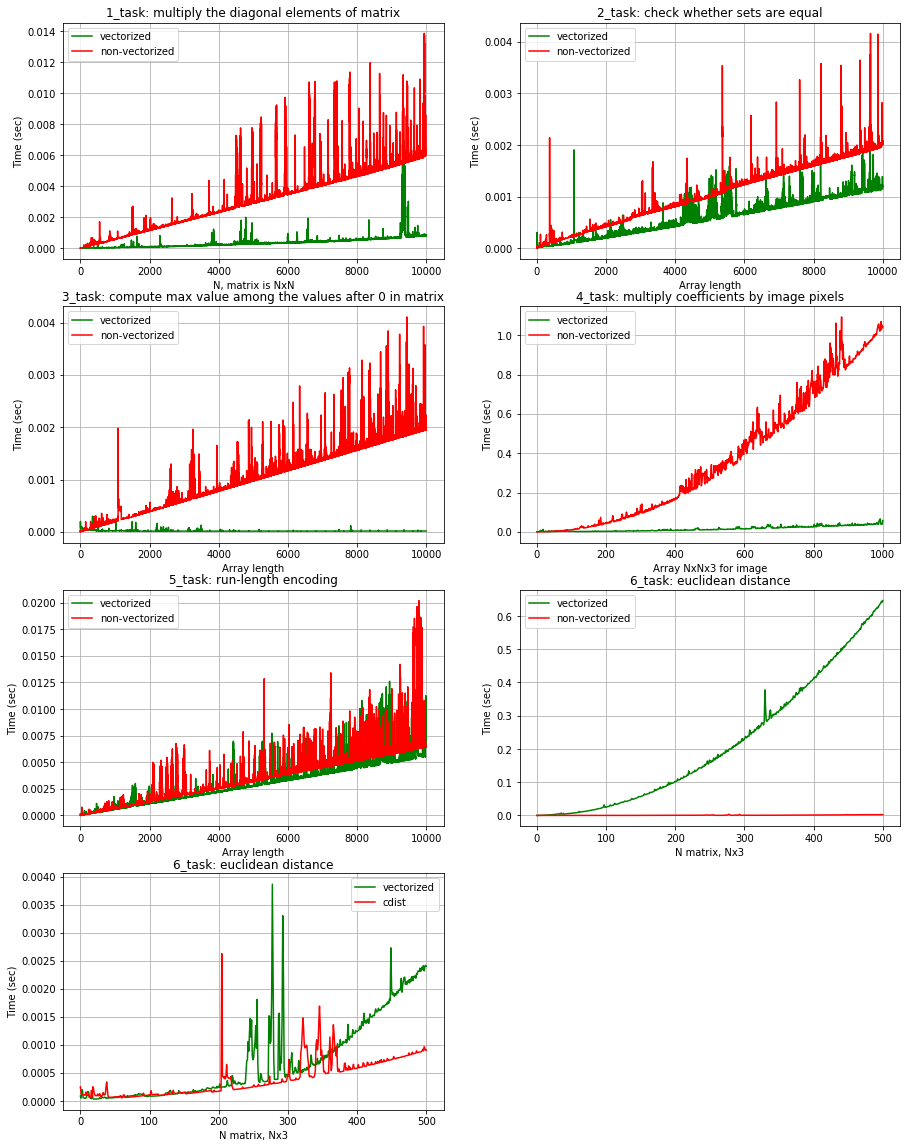

In [111]:
plt.figure(figsize=(15, 20))
plt.subplot(421)
plt.plot(X1, Y1_np, 'g', label="vectorized")
plt.plot(X1, Y1, 'r-', label="non-vectorized")
plt.legend()
plt.grid(True)
plt.title('1_task: multiply the diagonal elements of matrix')
plt.xlabel('N, matrix is NxN')
plt.ylabel('Time (sec)')

plt.subplot(422)
plt.plot(X2, Y2_np, 'g', label="vectorized")
plt.plot(X2, Y2, 'r-', label="non-vectorized")
plt.legend()
plt.grid(True)
plt.title('2_task: check whether sets are equal')
plt.xlabel('Array length')
plt.ylabel('Time (sec)')

plt.subplot(423)
plt.plot(X3, Y3_np, 'g', label="vectorized")
plt.plot(X3, Y3, 'r-', label="non-vectorized")
plt.legend()
plt.grid(True)
plt.title('3_task: compute max value among the values after 0 in matrix')
plt.xlabel('Array length')
plt.ylabel('Time (sec)')

plt.subplot(424)
plt.plot(X4, Y4_np, 'g', label="vectorized")
plt.plot(X4, Y4, 'r-', label="non-vectorized")
plt.legend()
plt.grid(True)
plt.title('4_task: multiply coefficients by image pixels')
plt.xlabel('Array NxNx3 for image')
plt.ylabel('Time (sec)')

plt.subplot(425)
plt.plot(X5, Y5_np, 'g', label="vectorized")
plt.plot(X5, Y5, 'r-', label="non-vectorized")
plt.legend()
plt.grid(True)
plt.title('5_task: run-length encoding')
plt.xlabel('Array length')
plt.ylabel('Time (sec)')

plt.subplot(426)
plt.plot(X6, Y6, 'g', label="vectorized")
plt.plot(X6, Y6_np, 'r-', label="non-vectorized")
plt.legend()
plt.grid(True)
plt.title('6_task: euclidean distance')
plt.xlabel('N matrix, Nx3')
plt.ylabel('Time (sec)')

plt.subplot(427)
plt.plot(X6, Y6_np, 'g', label="vectorized")
plt.plot(X6, Y6_dist, 'r-', label="cdist")
plt.legend()
plt.grid(True)
plt.title('6_task: euclidean distance')
plt.xlabel('N matrix, Nx3')
plt.ylabel('Time (sec)')

plt.show()